In [1]:
from cmeutils.structure import (
    bond_distribution,
    angle_distribution,
    dihedral_distribution,
    gsd_rdf,
    #persistence_length
)
from cmeutils.polymers import persistence_length
from cmeutils.plotting import get_histogram
#from msibi.utils.smoothing import savitzky_golay
#from msibi.potentials import linear_head_correction
from polybinderCG.coarse_grain import System
from utils import radius_of_gyration, end_to_end

import gsd.hoomd
import matplotlib.pyplot as plt
import numpy as np
import signac


import os

ModuleNotFoundError: No module named 'boltons'

# Functions and matplotlib config:

In [ ]:
def moving_average_smoothing(raw_data, w):
        return np.convolve(raw_data, np.ones(w), "same")/w

    
def hoomd_dihedral(phi, phi0, k, d, n):
    return 0.5*k*(1+d*np.cos(n*phi - phi0))

def bond_harmonic(l, l0, k):
    return (0.5*k*(l-l0)**2)
    
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 2
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.marker"] = "o"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200

label_conv = {
    0.60: "60/40",
    0.70: "70/30",
    0.80: "80/20",
    1.0: "100/0",
}

# Signac Projects:

In [ ]:
# Target single chain sims used to obtain distributions:
#project = signac.get_project("../learning-runs/single-two-chains/")
project = signac.get_project("../learning-runs/single-two-chains/")

# UA and CG single chain sims swept over a temperature and T/I range to find Rg, Re, Lp values:
#cg_project = signac.get_project("../../coarse-grain-sims/single-chain-pl-rg-re/polybinder-flow/")
#?ua_project = signac.get_project("../../ua-target-runs/single-chain-pl-rg-ua/polybinder-flow/")
#ua_project = signac.get_project("../ua-target-sims/pl-rg-re-sims/polybinder-flow/")

# Table of Contents  

### 1. [Angle Distributions](#bondangles)
### 2. [Dihedral Distributions](#bonddihedrals)
### 3. [Bond Length Distributions](#bondlengths)
### 4. [Single Chain RDFs](#rdfs)
### 5. [Chain Structure](#chainstructure)  

### - Trends with T/I Ratio:  
#### A. [Persistence Length](#persistencelength)  
#### B. [Radius of Gyration](#radiusofgyration)  
#### C. [End-to-End Distance](#endtoend)  
    
### - Trends with Temperature  
#### D. [Persistence Length](#persistencelengthtemp)  
#### E. [Radius of Gyration](#radiusofgyrationtemp)  
#### F. [End-to-End Distance](#endtoendtemp)  

# Angles <a name="bondangles"></a>

### EKK Angles <a name="ekkbondangles"></a>

In [2]:
fig = plt.figure()
kT = 8.5
for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    #if weight != 0.7:
    #    continue
    print(job.id, weight)
    adist = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True,
        bins=200
    )
    smooth = savitzky_golay(adist[:,1], window_size=13, order=1)
    #plt.plot(adist[:,0], smooth, "-", label=weight, c=color_dict[weight], linewidth=2)
    plt.plot(
        adist[:,0],
        smooth,
        label=label_conv[weight],
        c=color_dict[weight]
    )
    #plt.plot(adist[:,0], adist[:,1], "k-", linewidth=1)

plt.title("EKK Angle")
plt.legend(title="T/I Ratio", loc="upper left")
plt.xlabel("$\Theta$ (rad)")
plt.ylabel("P($\Theta$)")

plt.xlim(0.5, np.pi)
fig.tight_layout()

NameError: name 'plt' is not defined

### KEK Angles <a name="ekkbondangles"></a>

<>:25: DeprecationWarning: invalid escape sequence \T
<>:26: DeprecationWarning: invalid escape sequence \T
<>:25: DeprecationWarning: invalid escape sequence \T
<>:26: DeprecationWarning: invalid escape sequence \T
/tmp/ipykernel_111464/3044449945.py:25: DeprecationWarning: invalid escape sequence \T
  plt.xlabel("$\Theta$ (rad)")
/tmp/ipykernel_111464/3044449945.py:26: DeprecationWarning: invalid escape sequence \T
  plt.ylabel("P($\Theta$)")


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


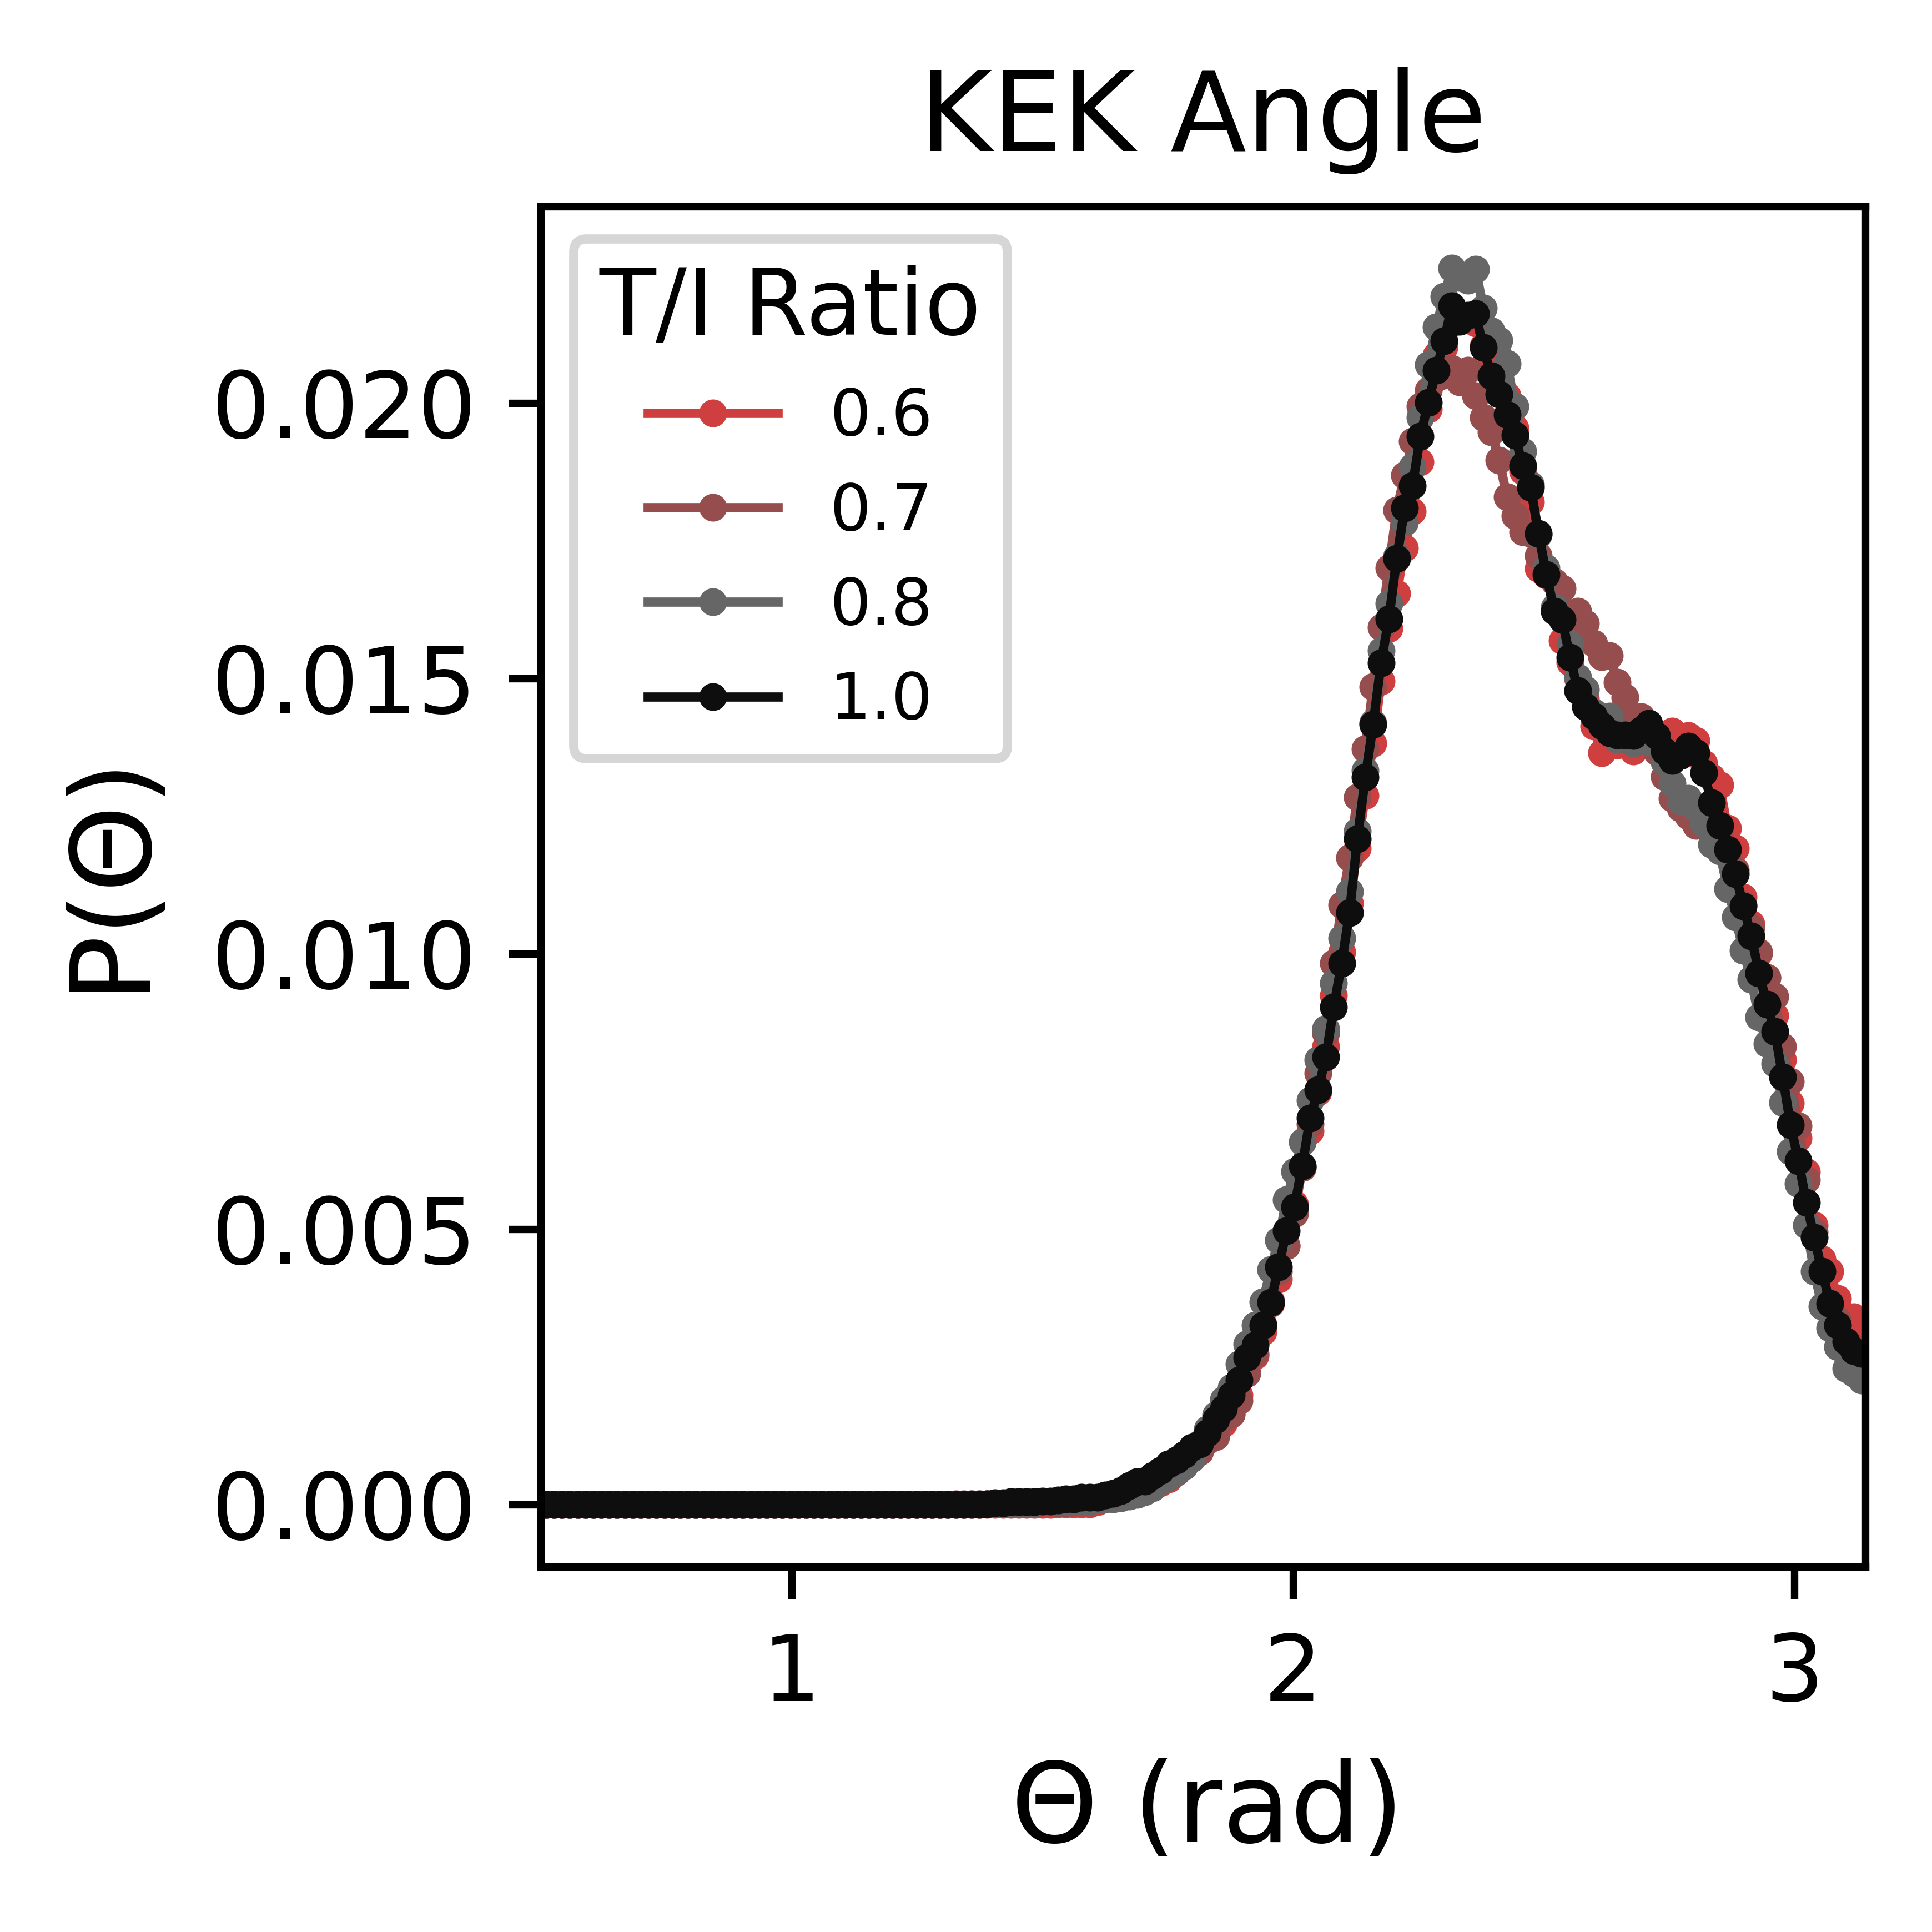

In [5]:
fig = plt.figure()
for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    #if weight != 0.7:
    #    continue
    print(job.id, weight)
    adist = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-300,
        histogram=True,
        normalize=True,
        bins=200
    )
    smooth = savitzky_golay(adist[:,1], window_size=13, order=1)
    #plt.plot(adist[:,0], smooth, "-", label=weight, c=color_dict[weight], linewidth=2)
    plt.plot(adist[:,0], smooth, label=weight, c=color_dict[weight])
    #plt.plot(adist[:,0], adist[:,1], "k-", linewidth=1)

plt.title("KEK Angle")
plt.legend(title="T/I Ratio", loc="upper left")
plt.xlabel("$\Theta$ (rad)")
plt.ylabel("P($\Theta$)")

plt.xlim(0.5, np.pi)
fig.tight_layout()

### KEK Angles <a name="kekbondangles"></a>

<>:24: DeprecationWarning: invalid escape sequence \T
<>:25: DeprecationWarning: invalid escape sequence \T
<>:24: DeprecationWarning: invalid escape sequence \T
<>:25: DeprecationWarning: invalid escape sequence \T
/tmp/ipykernel_57534/3600564916.py:24: DeprecationWarning: invalid escape sequence \T
  plt.xlabel("$\Theta$ (rad)")
/tmp/ipykernel_57534/3600564916.py:25: DeprecationWarning: invalid escape sequence \T
  plt.ylabel("P($\Theta$)")


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


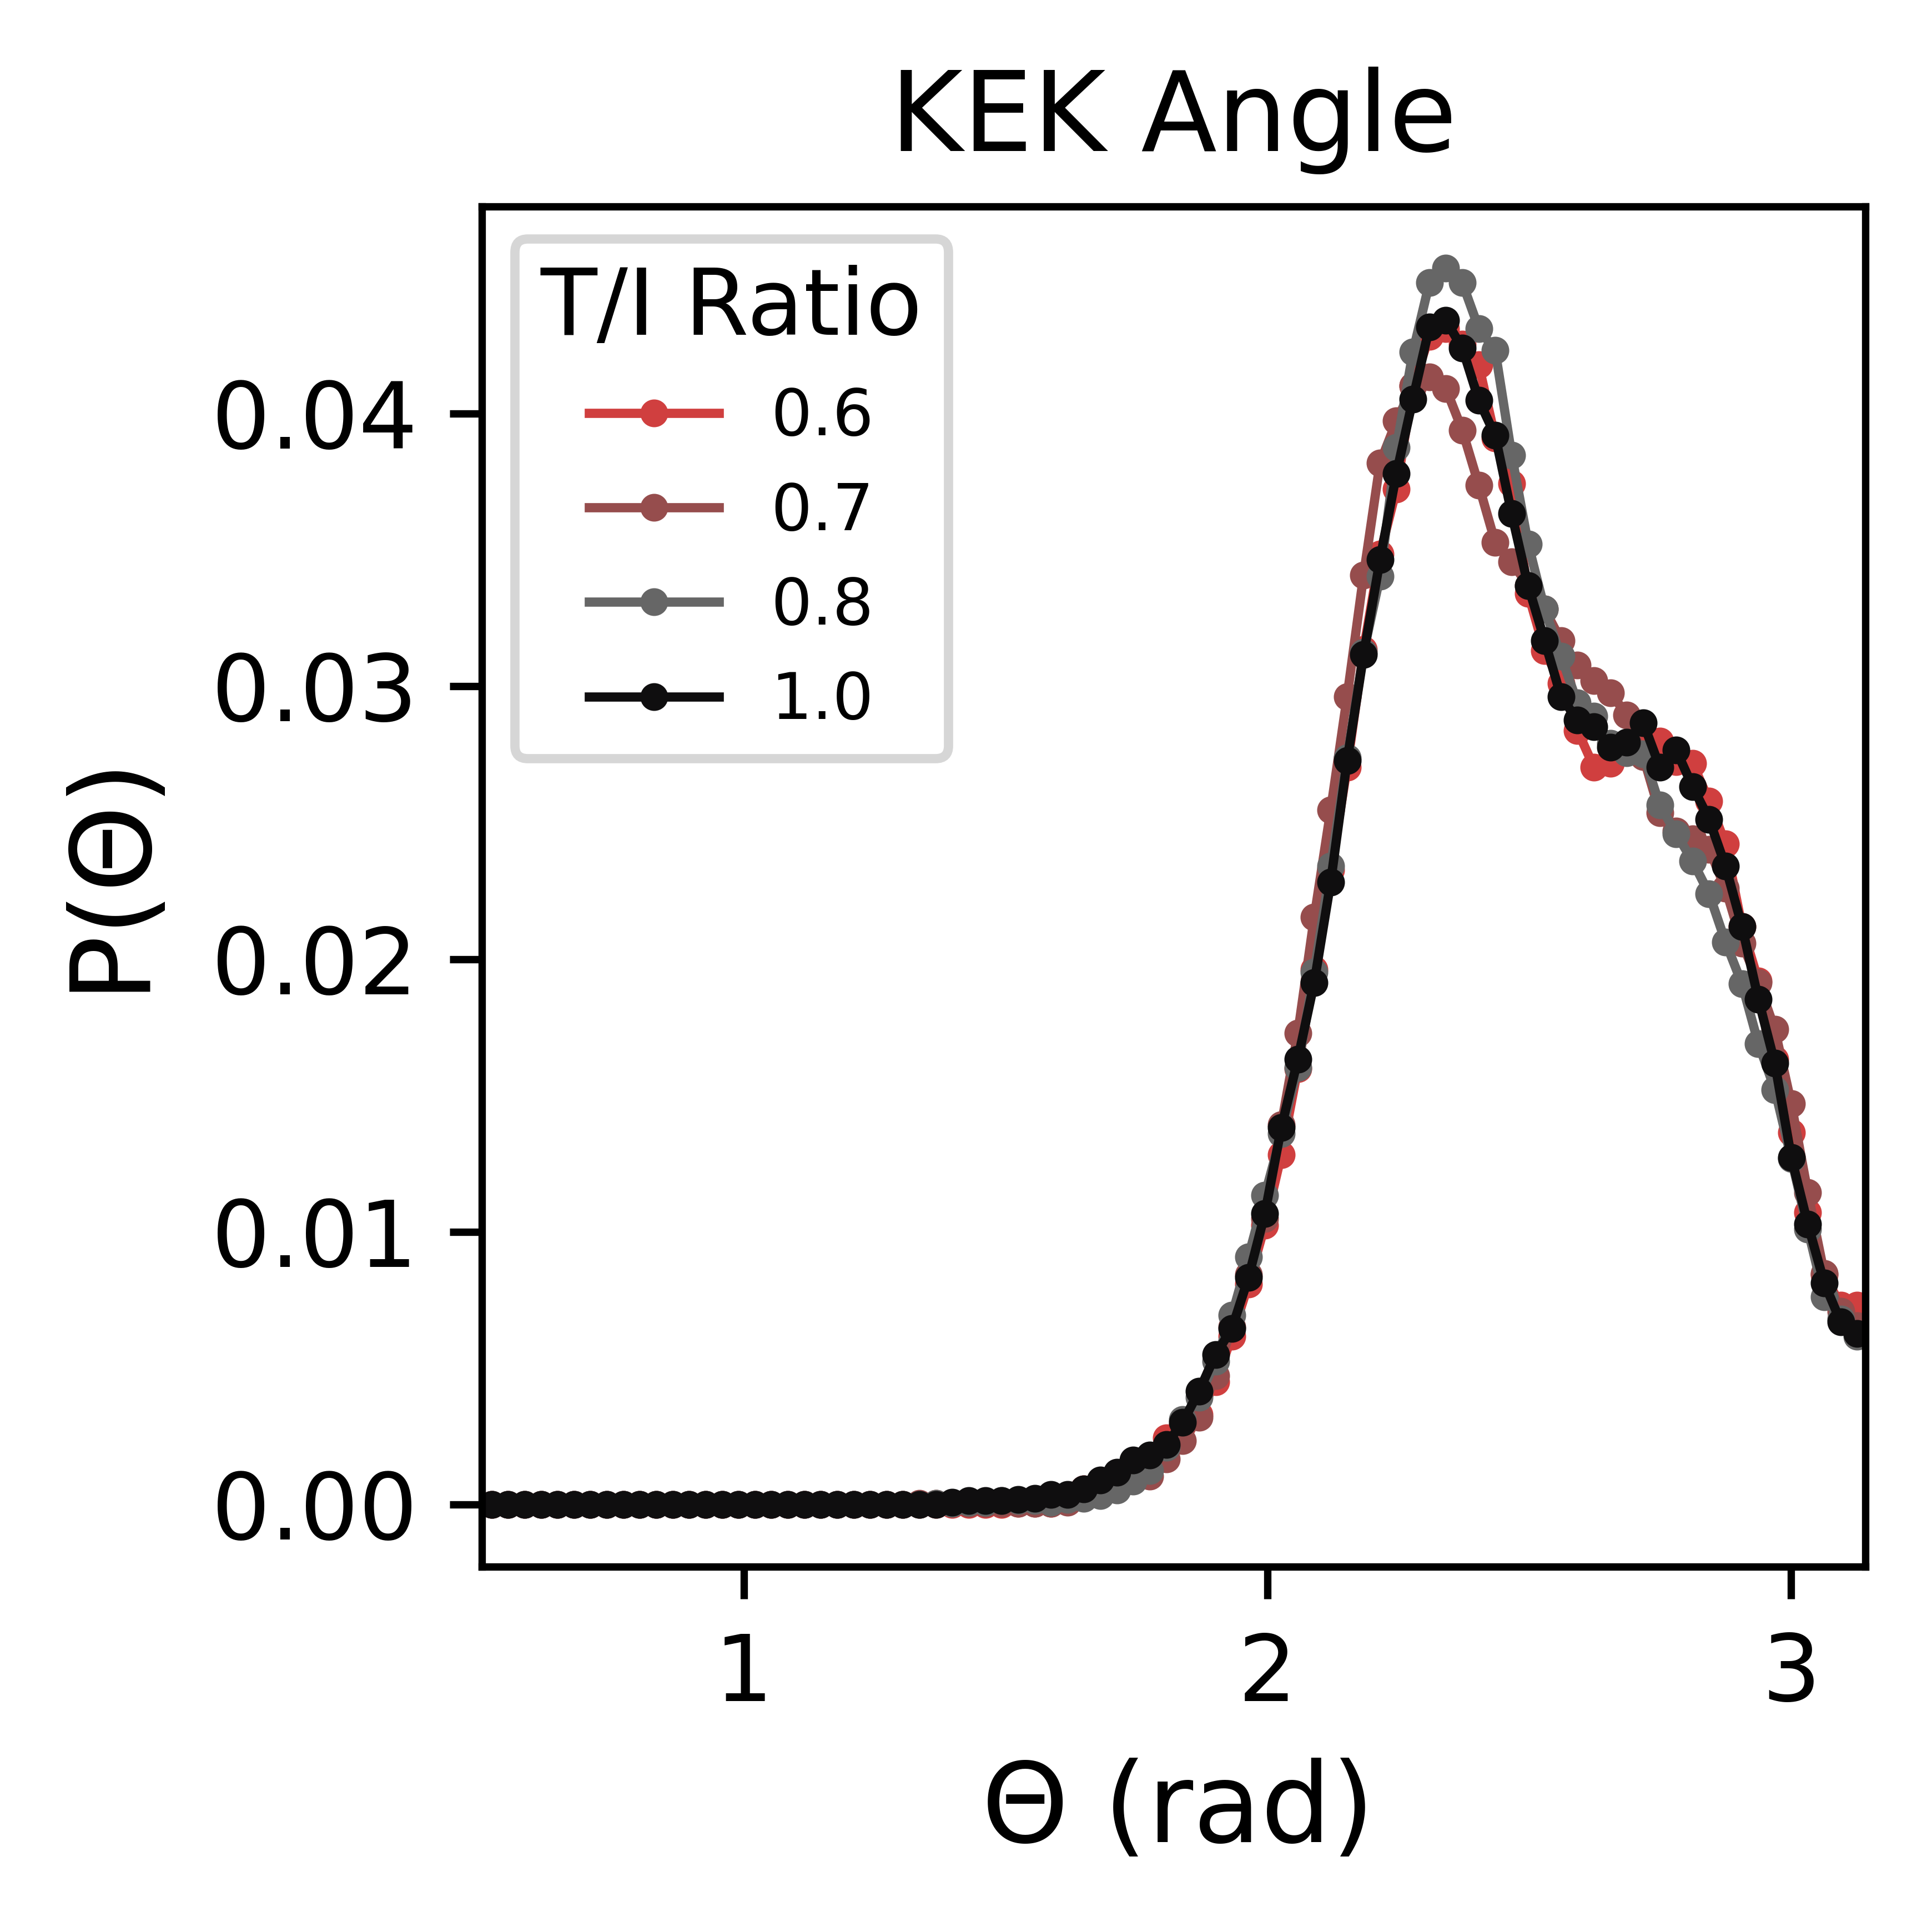

In [8]:
kT = 8.5
n_bins = 100
fig = plt.figure()

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    adist = angle_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        start=-200,
        histogram=True,
        normalize=True,
        bins=n_bins
    )
    smooth = savitzky_golay(adist[:,1], window_size=7, order=1)
    plt.plot(adist[:,0], smooth, label=weight, c=color_dict[weight])

plt.title("KEK Angle")
plt.legend(title="T/I Ratio", loc="upper left")
plt.xlabel("$\Theta$ (rad)")
plt.ylabel("P($\Theta$)")

plt.xlim(0.5, np.pi)
fig.tight_layout()

# Dihedrals: <a name="bonddihedrals"></a>

### EKKE Dihedral

<>:25: DeprecationWarning: invalid escape sequence \P
<>:26: DeprecationWarning: invalid escape sequence \P
<>:27: DeprecationWarning: invalid escape sequence \p
<>:27: DeprecationWarning: invalid escape sequence \p
<>:25: DeprecationWarning: invalid escape sequence \P
<>:26: DeprecationWarning: invalid escape sequence \P
<>:27: DeprecationWarning: invalid escape sequence \p
<>:27: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_98802/4171069707.py:25: DeprecationWarning: invalid escape sequence \P
  ax.set_xlabel("$\Phi$ (rad)")
/tmp/ipykernel_98802/4171069707.py:26: DeprecationWarning: invalid escape sequence \P
  ax.set_ylabel("P($\Phi$)")
/tmp/ipykernel_98802/4171069707.py:27: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])
/tmp/ipykernel_98802/4171069707.py:27: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


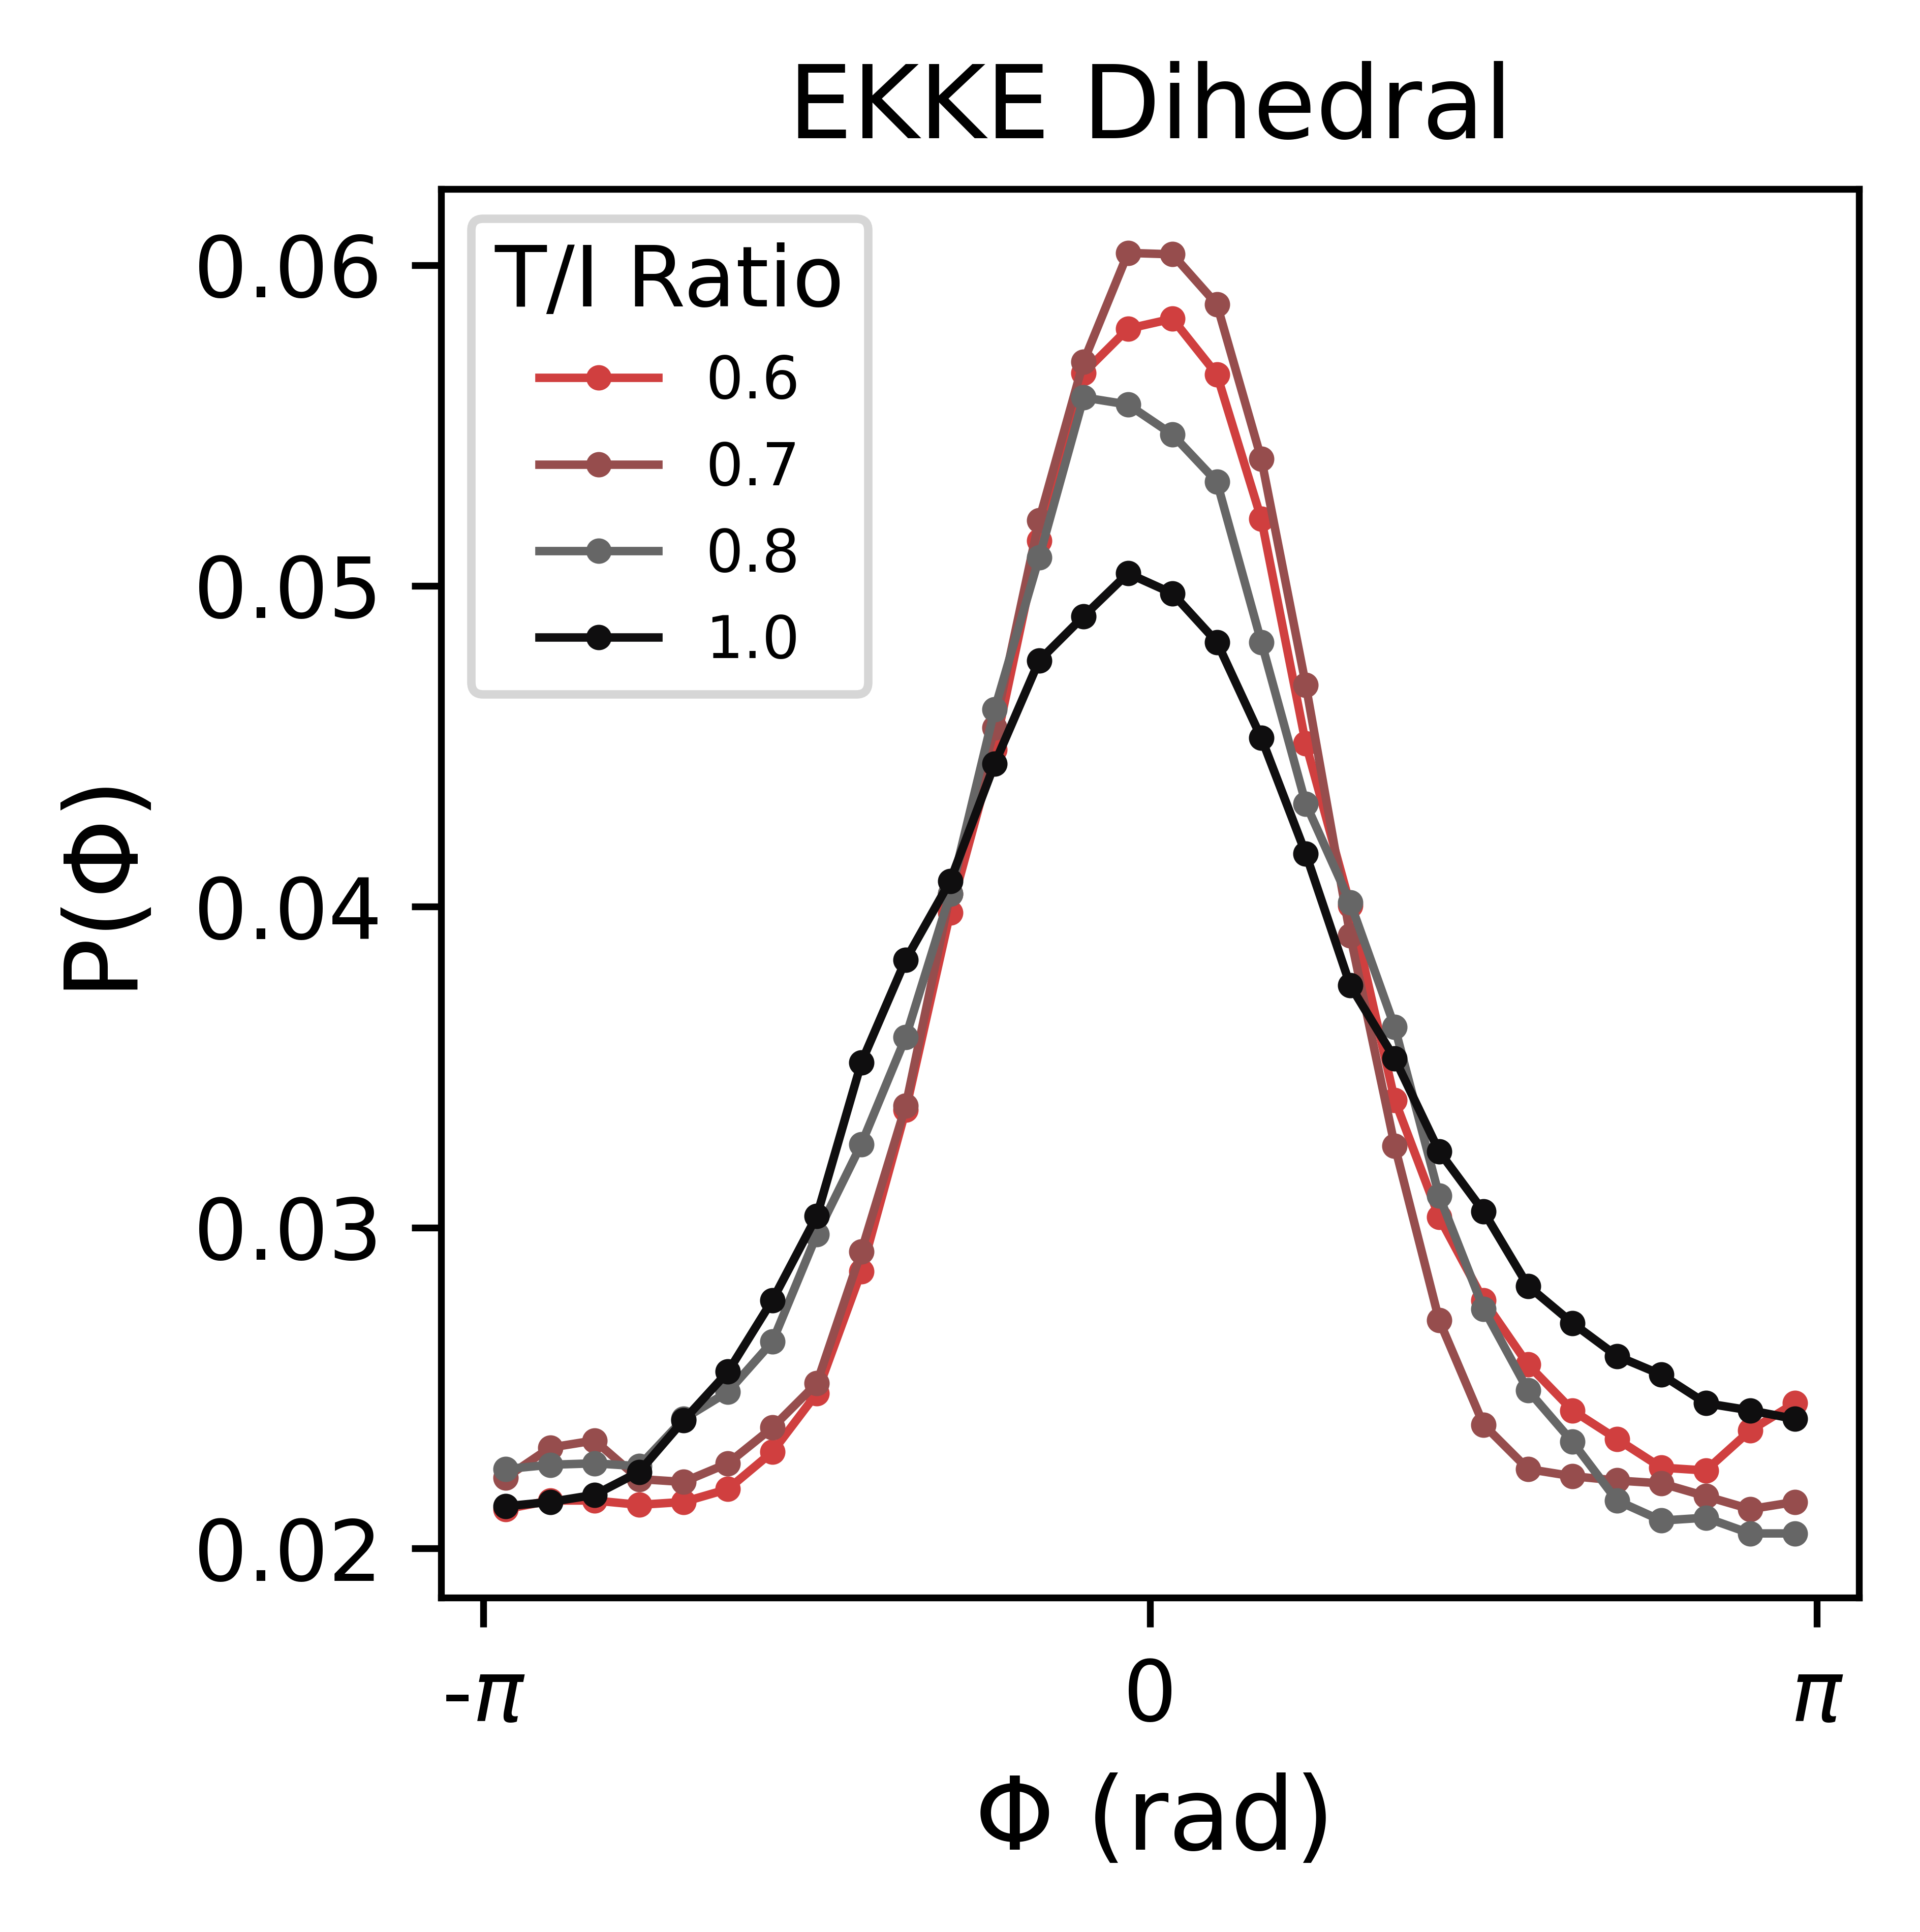

In [4]:
n_bins = 30
kT = 8.5
fig, ax = plt.subplots(1,1, figsize=(3,3))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    ddist = dihedral_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        D_name = "E",
        start=-300,
        histogram=True,
        normalize=True,
        bins=n_bins,
    )
    smooth = savitzky_golay(ddist[:,1], window_size=5, order=1)
    ax.plot(ddist[:,0], smooth, label=weight, c=color_dict[weight])
    
ax.set_title("EKKE Dihedral")    
ax.legend(title="T/I Ratio", loc="upper left")
ax.set_xlabel("$\Phi$ (rad)")
ax.set_ylabel("P($\Phi$)")
ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])

### EKKE Boltzmann Inverse

<>:40: DeprecationWarning: invalid escape sequence \P
<>:41: DeprecationWarning: invalid escape sequence \P
<>:42: DeprecationWarning: invalid escape sequence \p
<>:42: DeprecationWarning: invalid escape sequence \p
<>:40: DeprecationWarning: invalid escape sequence \P
<>:41: DeprecationWarning: invalid escape sequence \P
<>:42: DeprecationWarning: invalid escape sequence \p
<>:42: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_111464/2418916245.py:40: DeprecationWarning: invalid escape sequence \P
  ax.set_xlabel("$\Phi$ (rad)")
/tmp/ipykernel_111464/2418916245.py:41: DeprecationWarning: invalid escape sequence \P
  ax.set_ylabel("V($\Phi$)")
/tmp/ipykernel_111464/2418916245.py:42: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])
/tmp/ipykernel_111464/2418916245.py:42: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


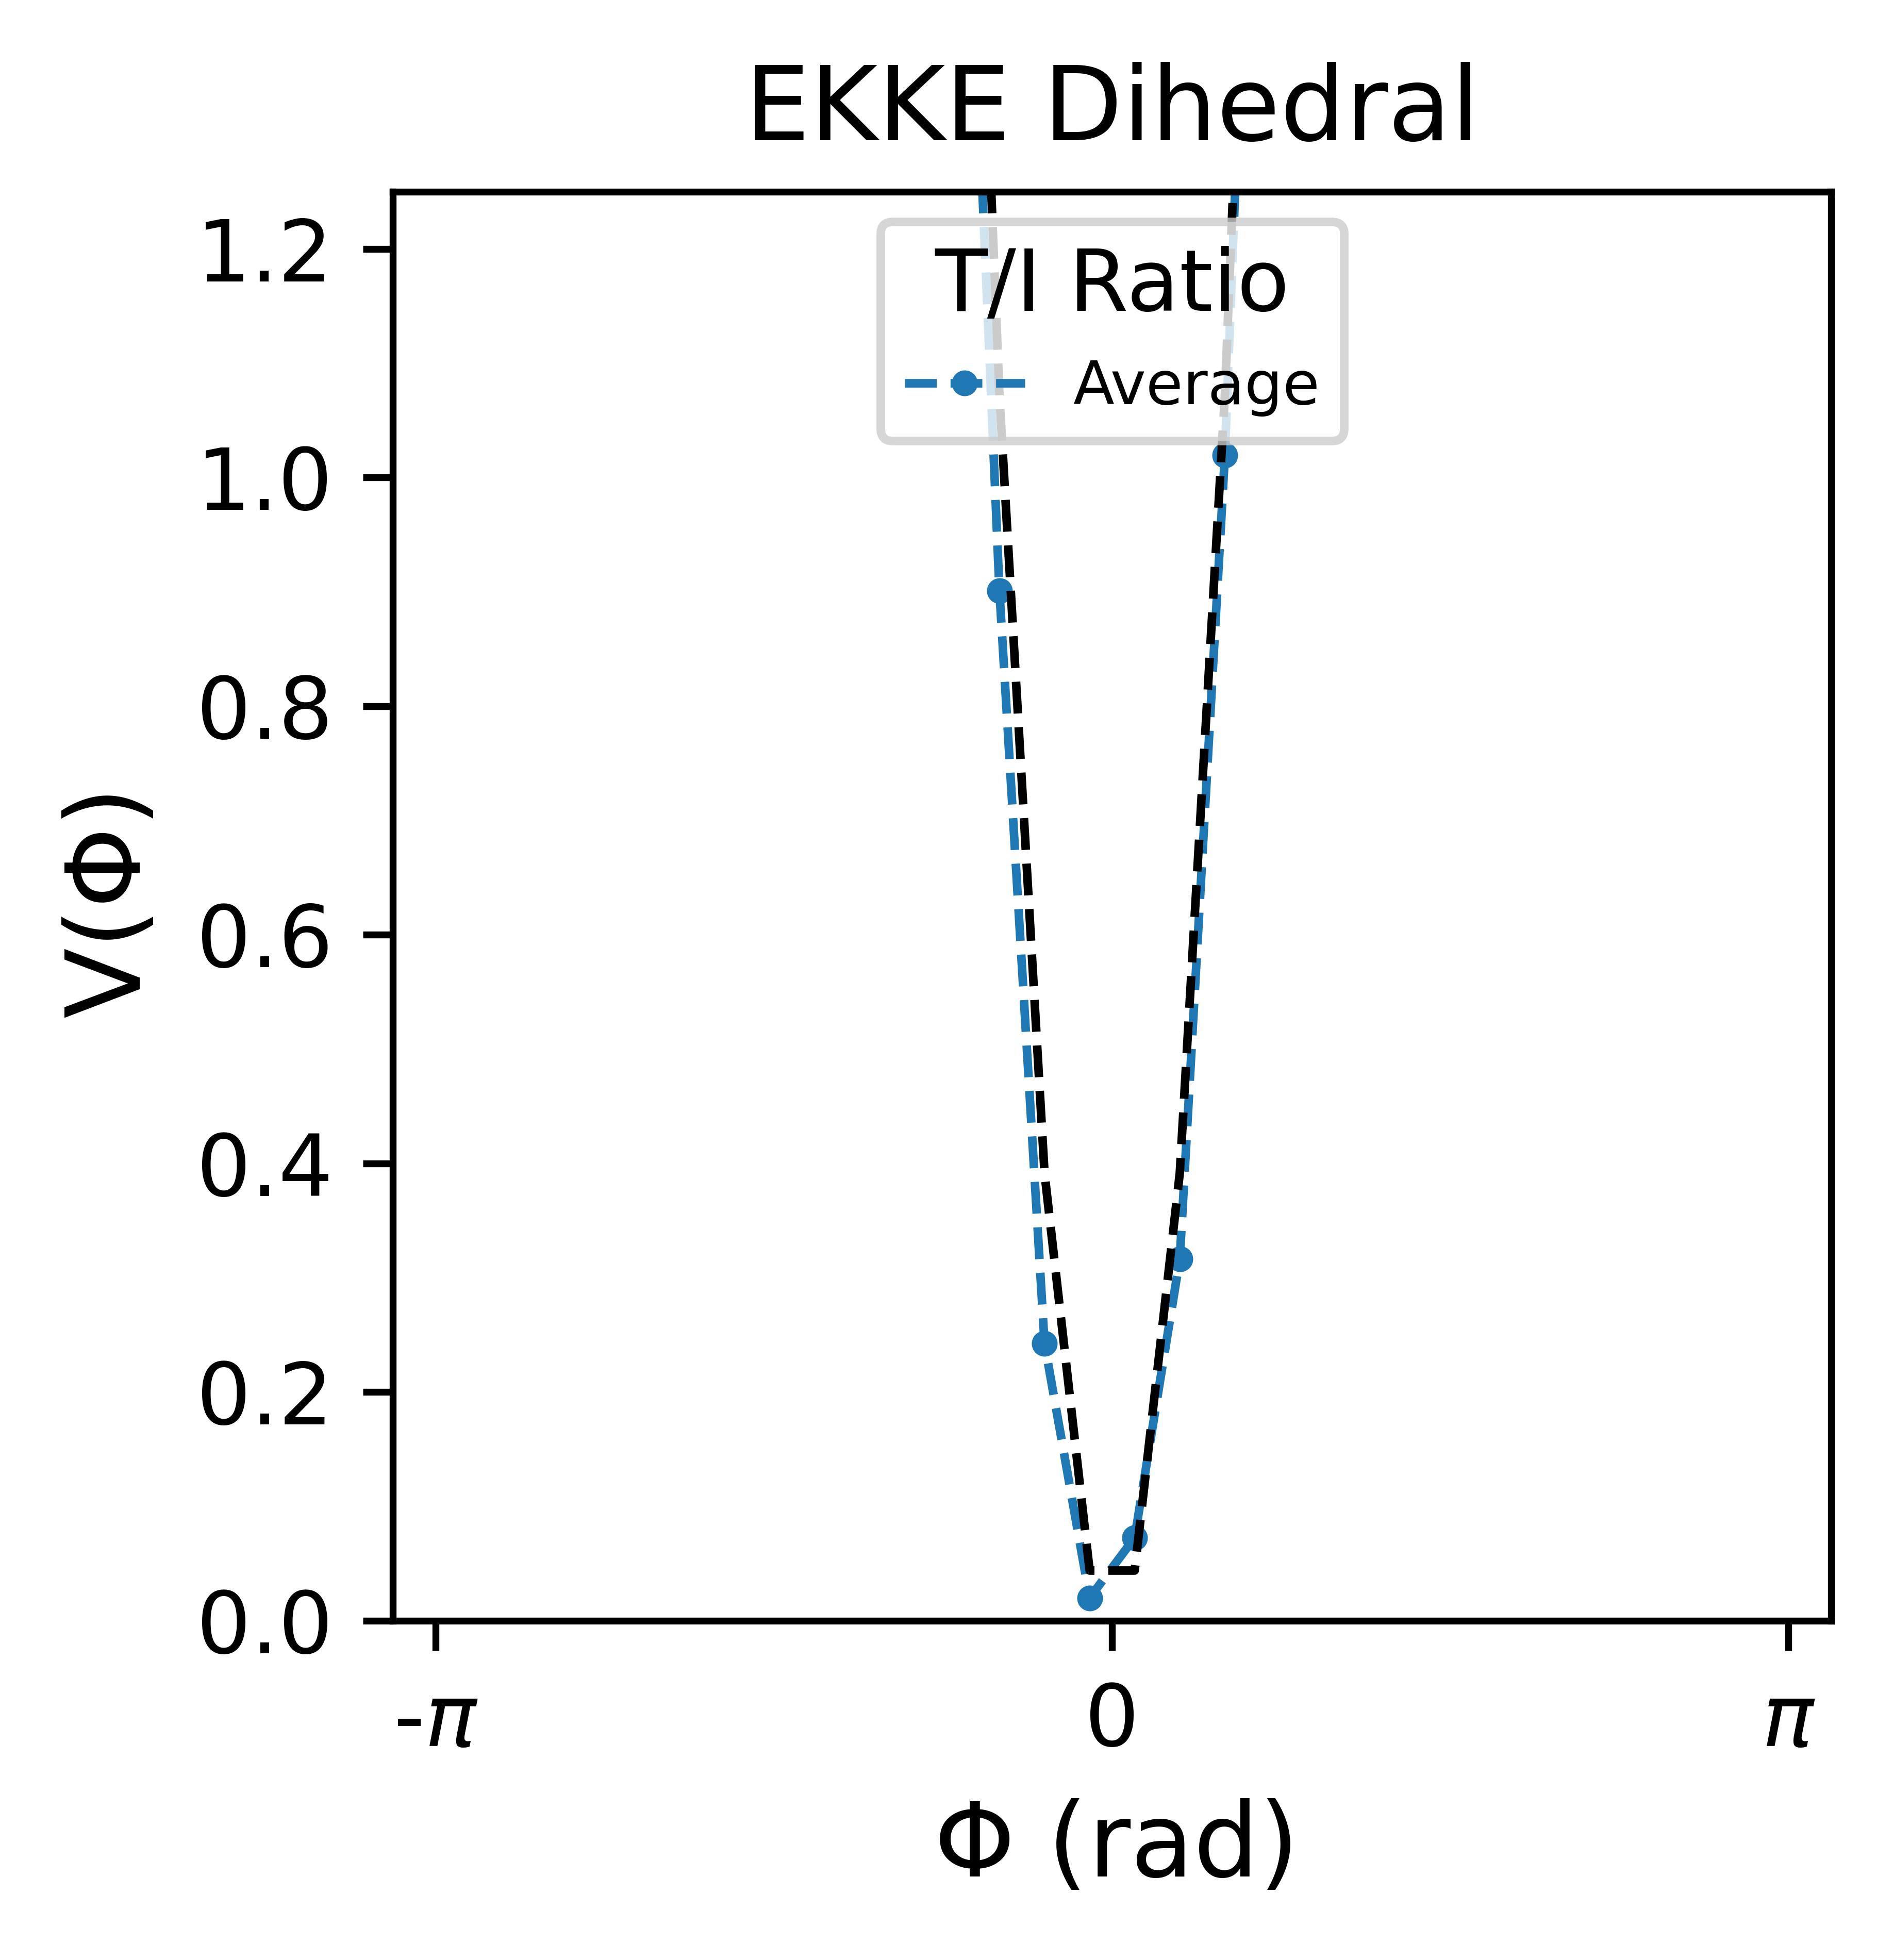

In [10]:
n_bins = 30
kT = 8.5
fig, ax = plt.subplots(1,1, figsize=(3,3))

avg_dih_inverse = np.zeros(30)

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    ddist = dihedral_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        C_name = "K",
        D_name = "E",
        start=-300,
        histogram=True,
        normalize=True,
        bins=n_bins,
    )
    smooth = savitzky_golay(ddist[:,1], window_size=5, order=1)
    V = -kT*np.log(smooth)
    V -= V.min()
    avg_dih_inverse += V

    #ax.plot(ddist[:,0], V, label=weight, c=color_dict[weight])    
    
ax.plot(ddist[:,0], avg_dih_inverse/4, ls="--", label="Average")
harmonic_fit = hoomd_dihedral(ddist[:,0], 0, k=16, d=-1, n=1)
ax.plot(ddist[:,0], harmonic_fit, "k--")

"""
def hoomd_dihedral(phi, phi0, k, d, n):
    return 0.5*k*(1+d*np.cos(n*phi - phi0))
"""
ax.set_ylim(0, 1.25)
ax.set_title("EKKE Dihedral")    
ax.legend(title="T/I Ratio", loc="upper center")
ax.set_xlabel("$\Phi$ (rad)")
ax.set_ylabel("V($\Phi$)")
ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])

### KEKK Dihedral

<>:26: DeprecationWarning: invalid escape sequence \P
<>:27: DeprecationWarning: invalid escape sequence \P
<>:28: DeprecationWarning: invalid escape sequence \p
<>:28: DeprecationWarning: invalid escape sequence \p
<>:26: DeprecationWarning: invalid escape sequence \P
<>:27: DeprecationWarning: invalid escape sequence \P
<>:28: DeprecationWarning: invalid escape sequence \p
<>:28: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_111464/3715212745.py:26: DeprecationWarning: invalid escape sequence \P
  ax.set_xlabel("$\Phi$ (rad)")
/tmp/ipykernel_111464/3715212745.py:27: DeprecationWarning: invalid escape sequence \P
  ax.set_ylabel("P($\Phi$)")
/tmp/ipykernel_111464/3715212745.py:28: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])
/tmp/ipykernel_111464/3715212745.py:28: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


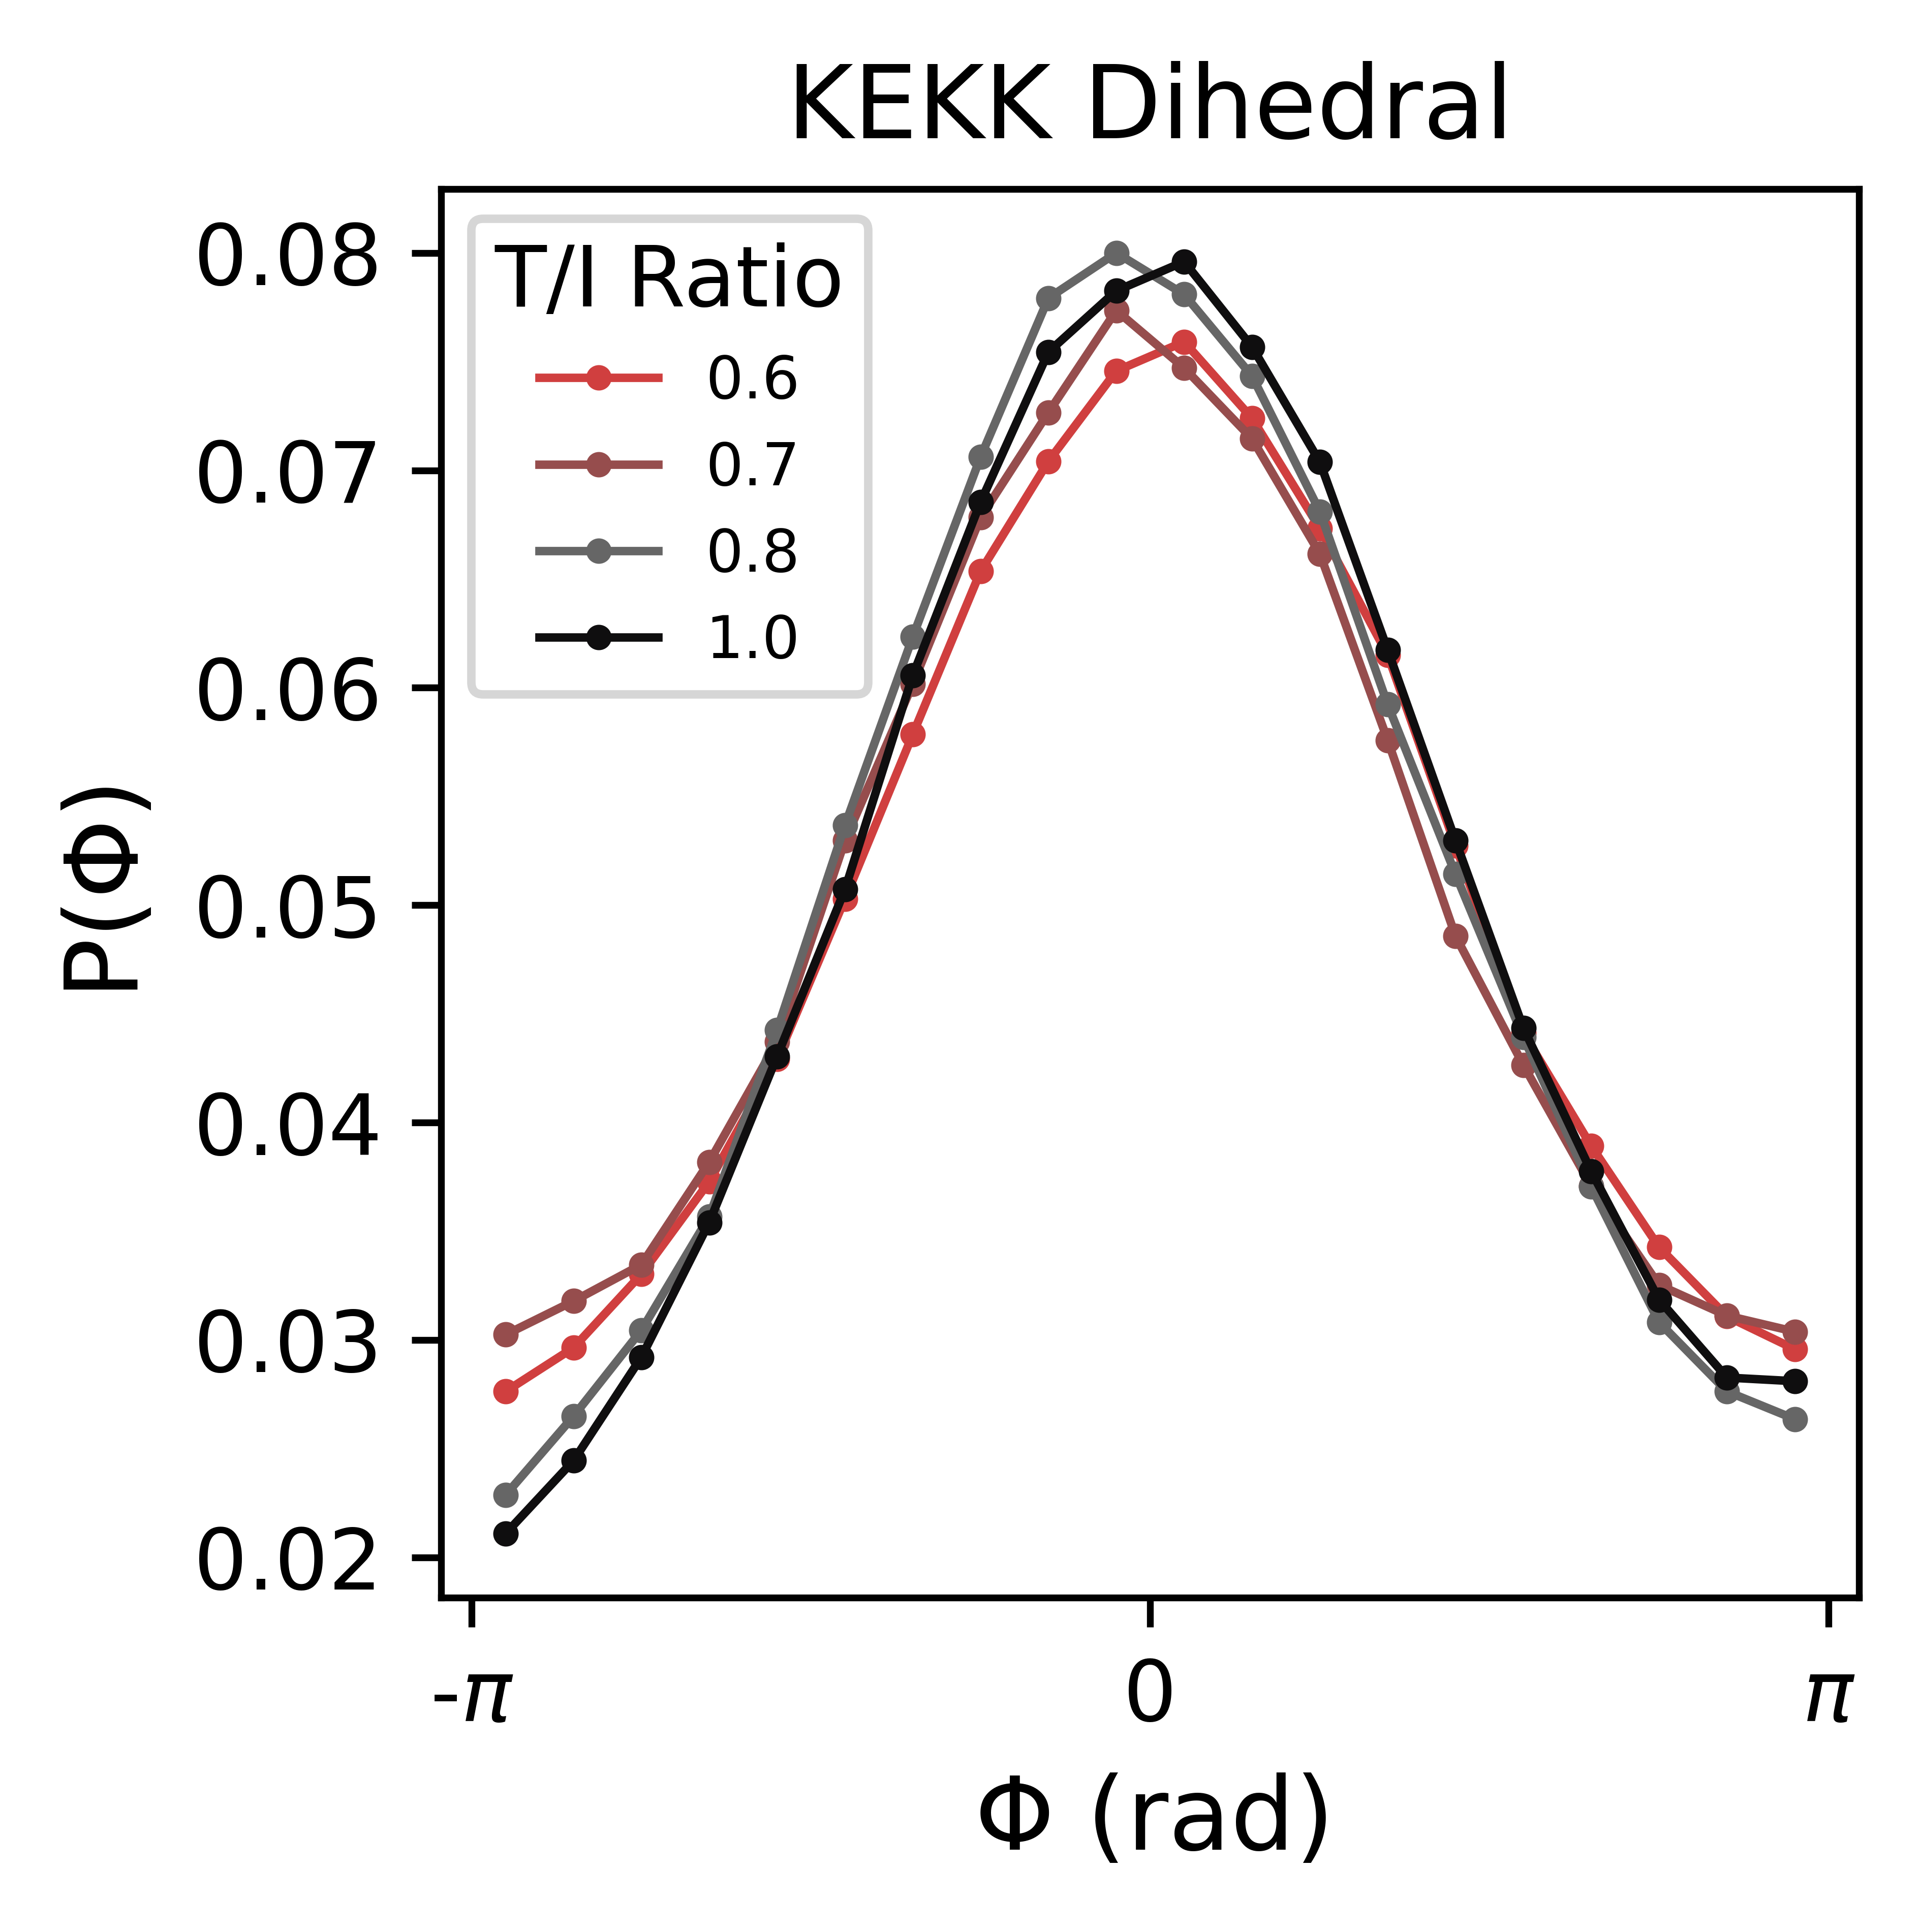

In [11]:
n_bins = 20
kT = 8.5
fig, ax = plt.subplots(1,1, figsize=(3,3))

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    ddist = dihedral_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        D_name = "K",
        start=-200,
        histogram=True,
        normalize=True,
        bins=n_bins
    )
    
    smooth = savitzky_golay(ddist[:,1], window_size=5, order=1)
    ax.plot(ddist[:,0], smooth, label=weight, c=color_dict[weight])
    
ax.set_title("KEKK Dihedral")    
ax.legend(title="T/I Ratio", loc="upper left")
ax.set_xlabel("$\Phi$ (rad)")
ax.set_ylabel("P($\Phi$)")
ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])

### KEKK Boltzmann Inverse

<>:40: DeprecationWarning: invalid escape sequence \P
<>:41: DeprecationWarning: invalid escape sequence \P
<>:42: DeprecationWarning: invalid escape sequence \p
<>:42: DeprecationWarning: invalid escape sequence \p
<>:40: DeprecationWarning: invalid escape sequence \P
<>:41: DeprecationWarning: invalid escape sequence \P
<>:42: DeprecationWarning: invalid escape sequence \p
<>:42: DeprecationWarning: invalid escape sequence \p
/tmp/ipykernel_111464/603718091.py:40: DeprecationWarning: invalid escape sequence \P
  ax.set_xlabel("$\Phi$ (rad)")
/tmp/ipykernel_111464/603718091.py:41: DeprecationWarning: invalid escape sequence \P
  ax.set_ylabel("V($\Phi$)")
/tmp/ipykernel_111464/603718091.py:42: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])
/tmp/ipykernel_111464/603718091.py:42: DeprecationWarning: invalid escape sequence \p
  ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


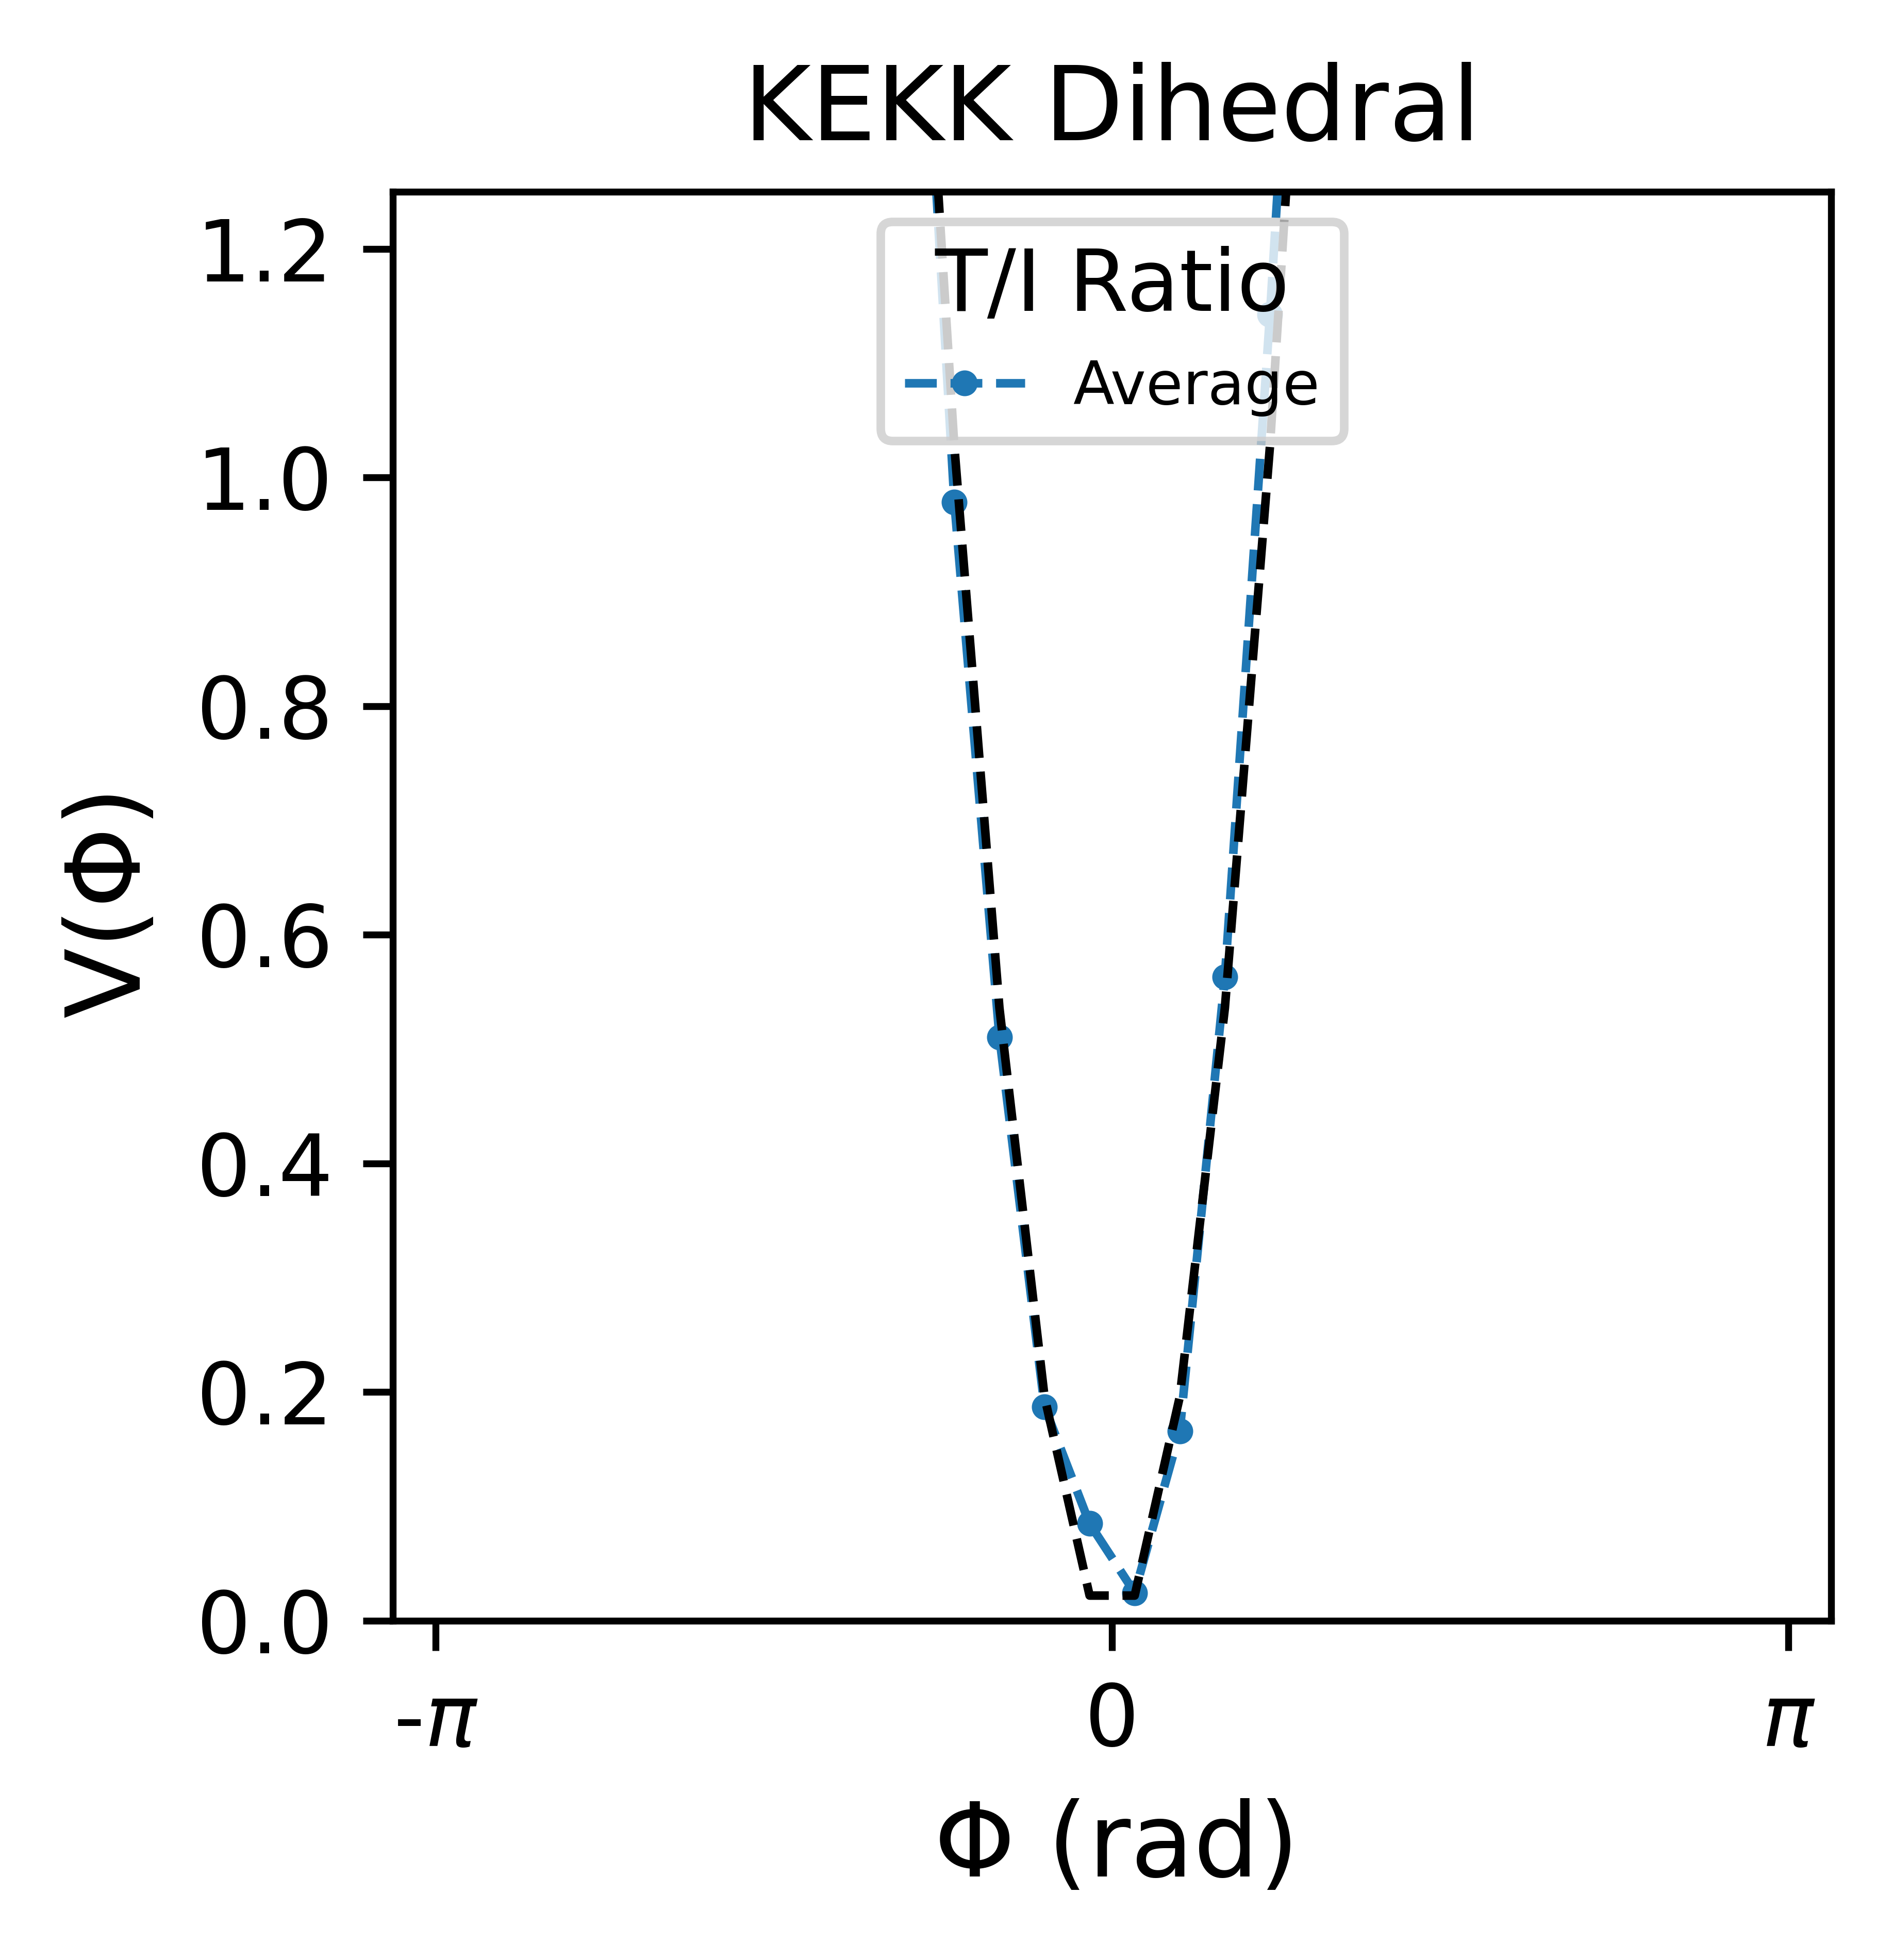

In [13]:
n_bins = 30
kT = 8.5
fig, ax = plt.subplots(1,1, figsize=(3,3))

avg_dih_inverse = np.zeros(30)

for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": kT}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    ddist = dihedral_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "E",
        C_name = "K",
        D_name = "K",
        start=-300,
        histogram=True,
        normalize=True,
        bins=n_bins,
    )
    smooth = savitzky_golay(ddist[:,1], window_size=5, order=1)
    V = -kT*np.log(smooth)
    V -= V.min()
    avg_dih_inverse += V

    #ax.plot(ddist[:,0], V, label=weight, c=color_dict[weight])    
    
ax.plot(ddist[:,0], avg_dih_inverse/4, ls="--", label="Average")
harmonic_fit = hoomd_dihedral(ddist[:,0], 0, k=8, d=-1, n=1)
ax.plot(ddist[:,0], harmonic_fit, "k--")

"""
def hoomd_dihedral(phi, phi0, k, d, n):
    return 0.5*k*(1+d*np.cos(n*phi - phi0))
"""
ax.set_ylim(0, 1.25)
ax.set_title("KEKK Dihedral")    
ax.legend(title="T/I Ratio", loc="upper center")
ax.set_xlabel("$\Phi$ (rad)")
ax.set_ylabel("V($\Phi$)")
ax.set_xticks([-np.pi, 0, np.pi], ["-$\pi$", 0, "$\pi$"])

# Bond Lengths:  <a name="bondlengths"></a>

### E-K Bonds

<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_57534/2947717695.py:20: DeprecationWarning: invalid escape sequence \s
  ax.set_xlabel("$L(\sigma)$")


0f7d32c8e731e2269e7ae1f9c5ae1688 0.6
00d55ee7f694f09241bdf5225919c1e8 0.7
5e94d9edfea54fe668c6b5fc12f88257 0.8
056c677e410e95f1c680146b9033007d 1.0


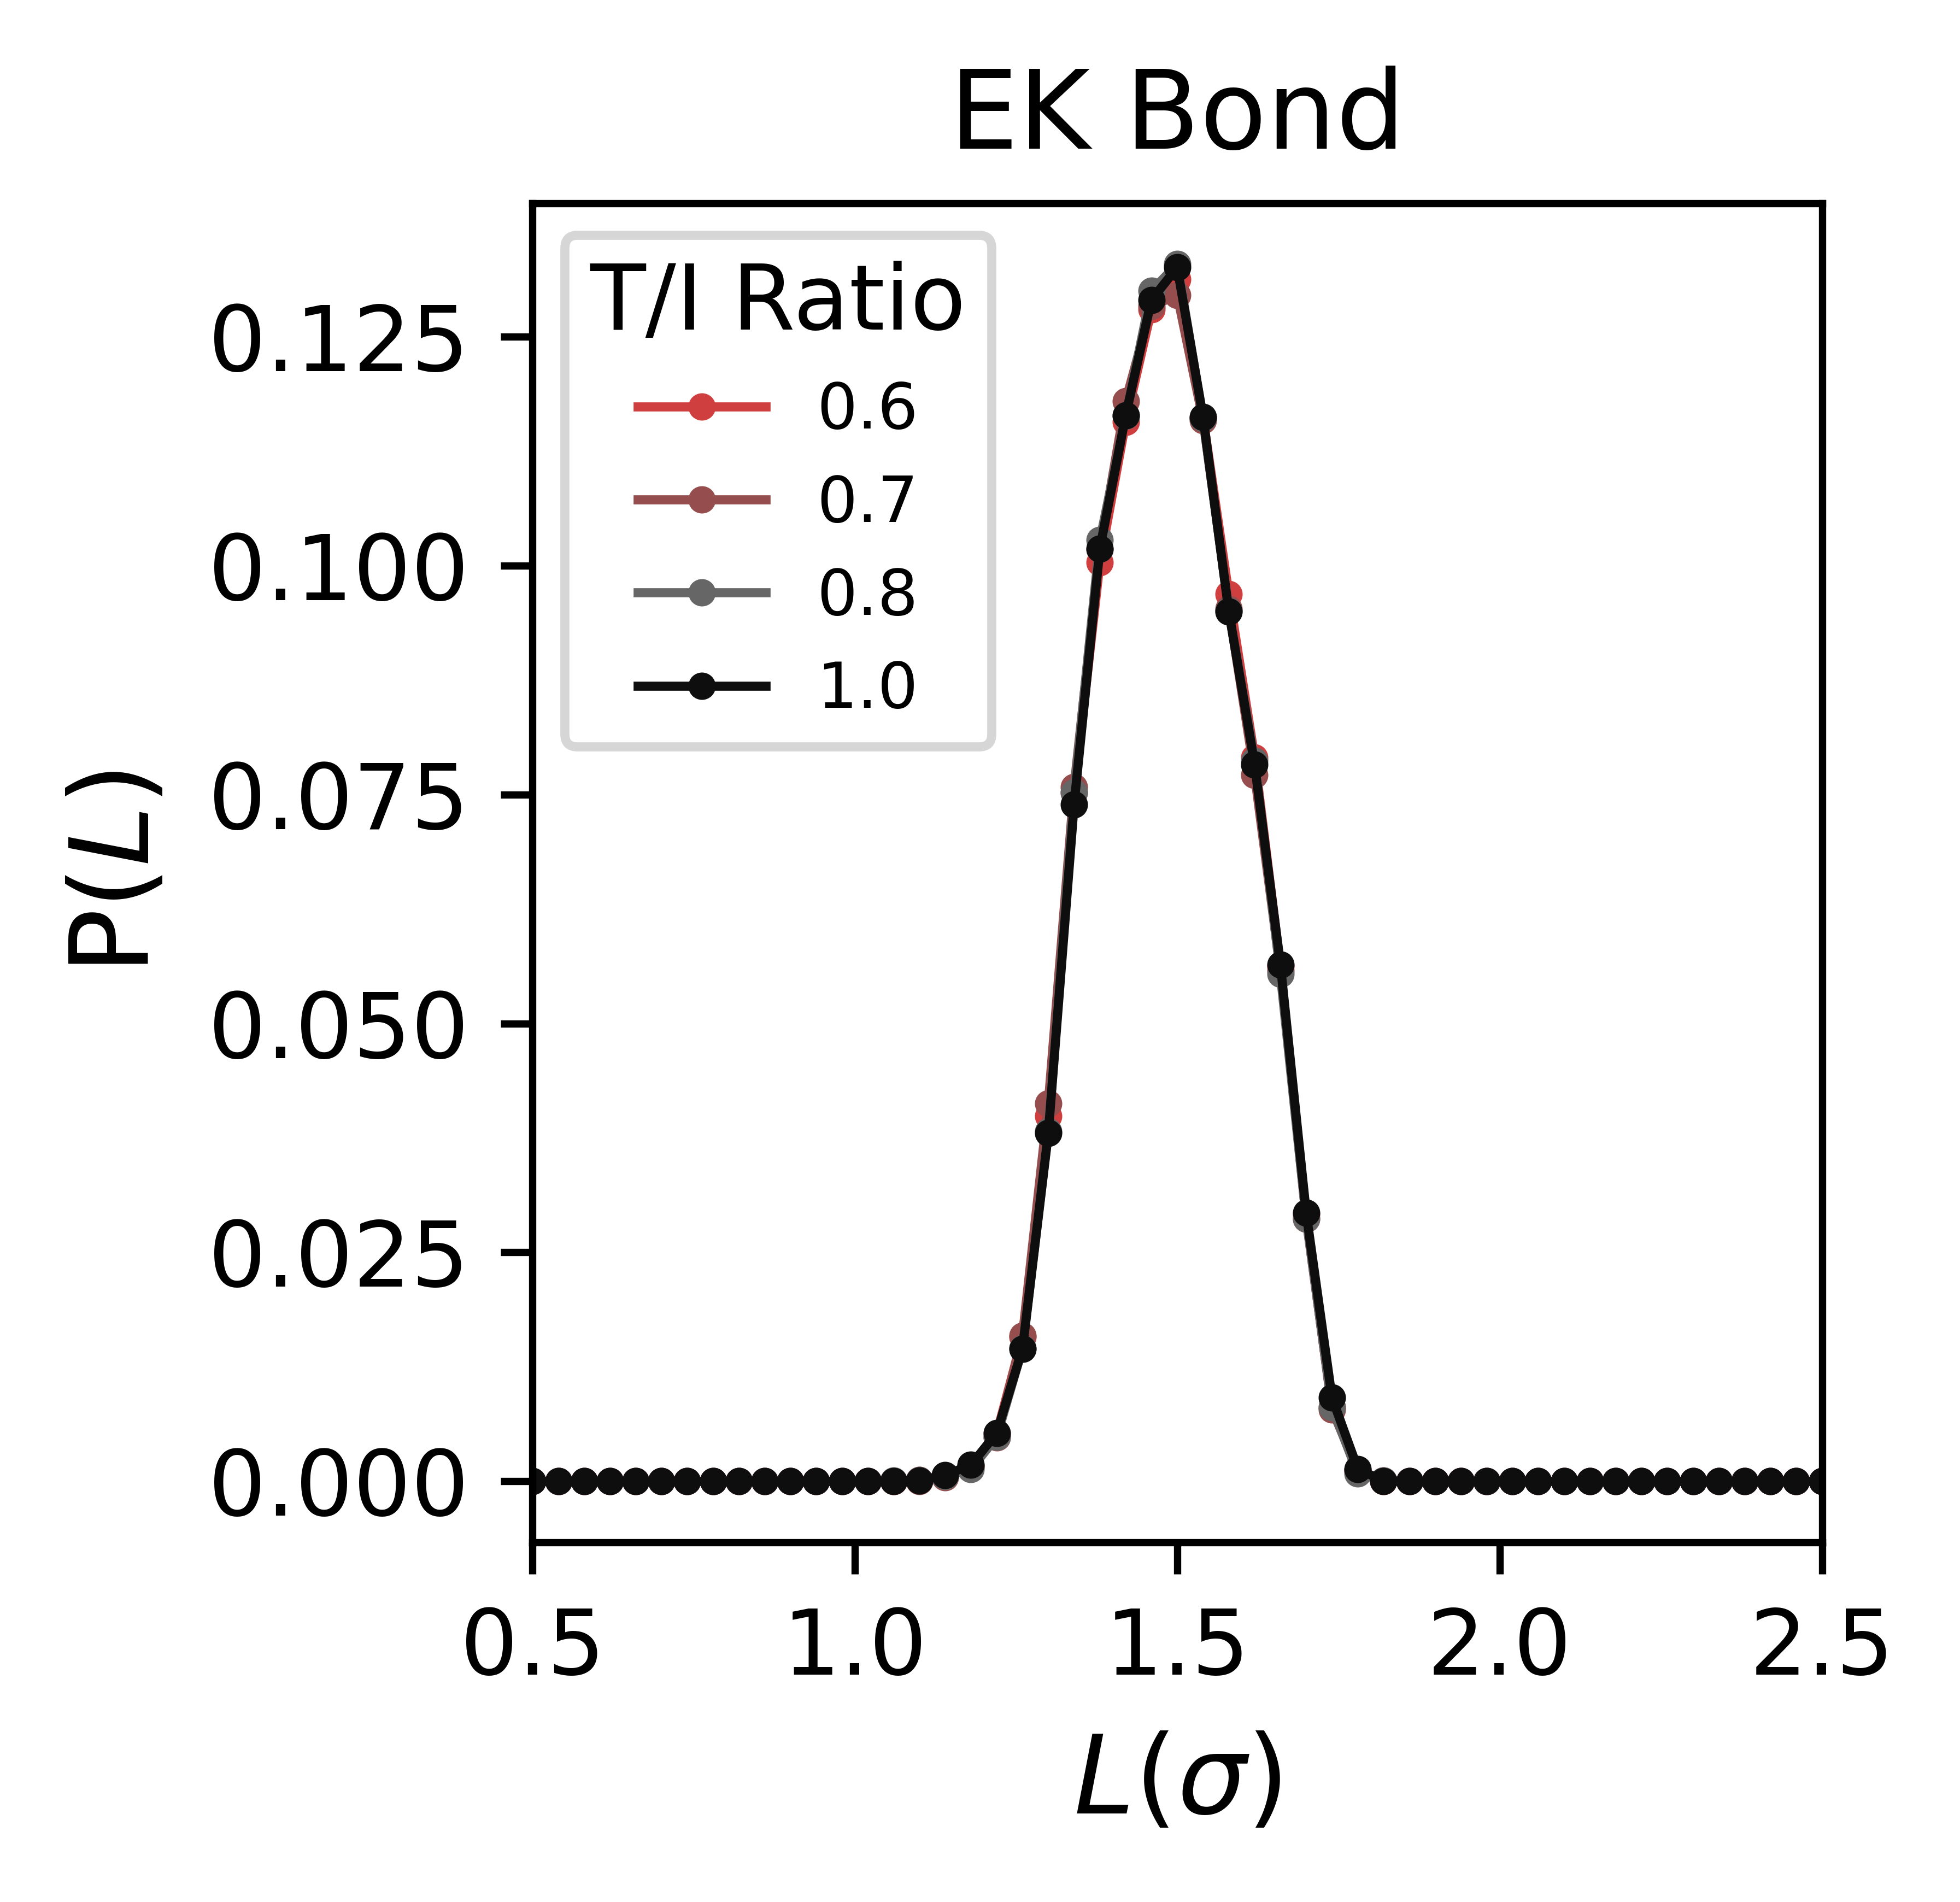

In [42]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

for weight, job in project.find_jobs(
{"polymer_lengths": [16], "kT_quench": 8.5}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    bdist = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-200,
        histogram=True
    )
    smooth = savitzky_golay(bdist[:,1], window_size=5, order=1)
    ax.plot(bdist[:,0], smooth, label=weight, c=color_dict[weight])
    
ax.legend(title="T/I Ratio", loc="upper left")
ax.set_title("EK Bond")
ax.set_xlim(0.5, 2.5)
ax.set_xlabel("$L(\sigma)$")
ax.set_ylabel("P($L$)")
fig.tight_layout()

## Boltzmann Inverse of E-K Bonds:

<>:64: DeprecationWarning: invalid escape sequence \T
<>:65: DeprecationWarning: invalid escape sequence \T
<>:64: DeprecationWarning: invalid escape sequence \T
<>:65: DeprecationWarning: invalid escape sequence \T
/tmp/ipykernel_111464/2997548603.py:64: DeprecationWarning: invalid escape sequence \T
  plt.xlabel("$\Theta$ (rad)")
/tmp/ipykernel_111464/2997548603.py:65: DeprecationWarning: invalid escape sequence \T
  plt.ylabel("V($\Theta$)")
/tmp/ipykernel_111464/2997548603.py:32: RuntimeWarning: divide by zero encountered in log
  V = -kT * np.log(smooth)


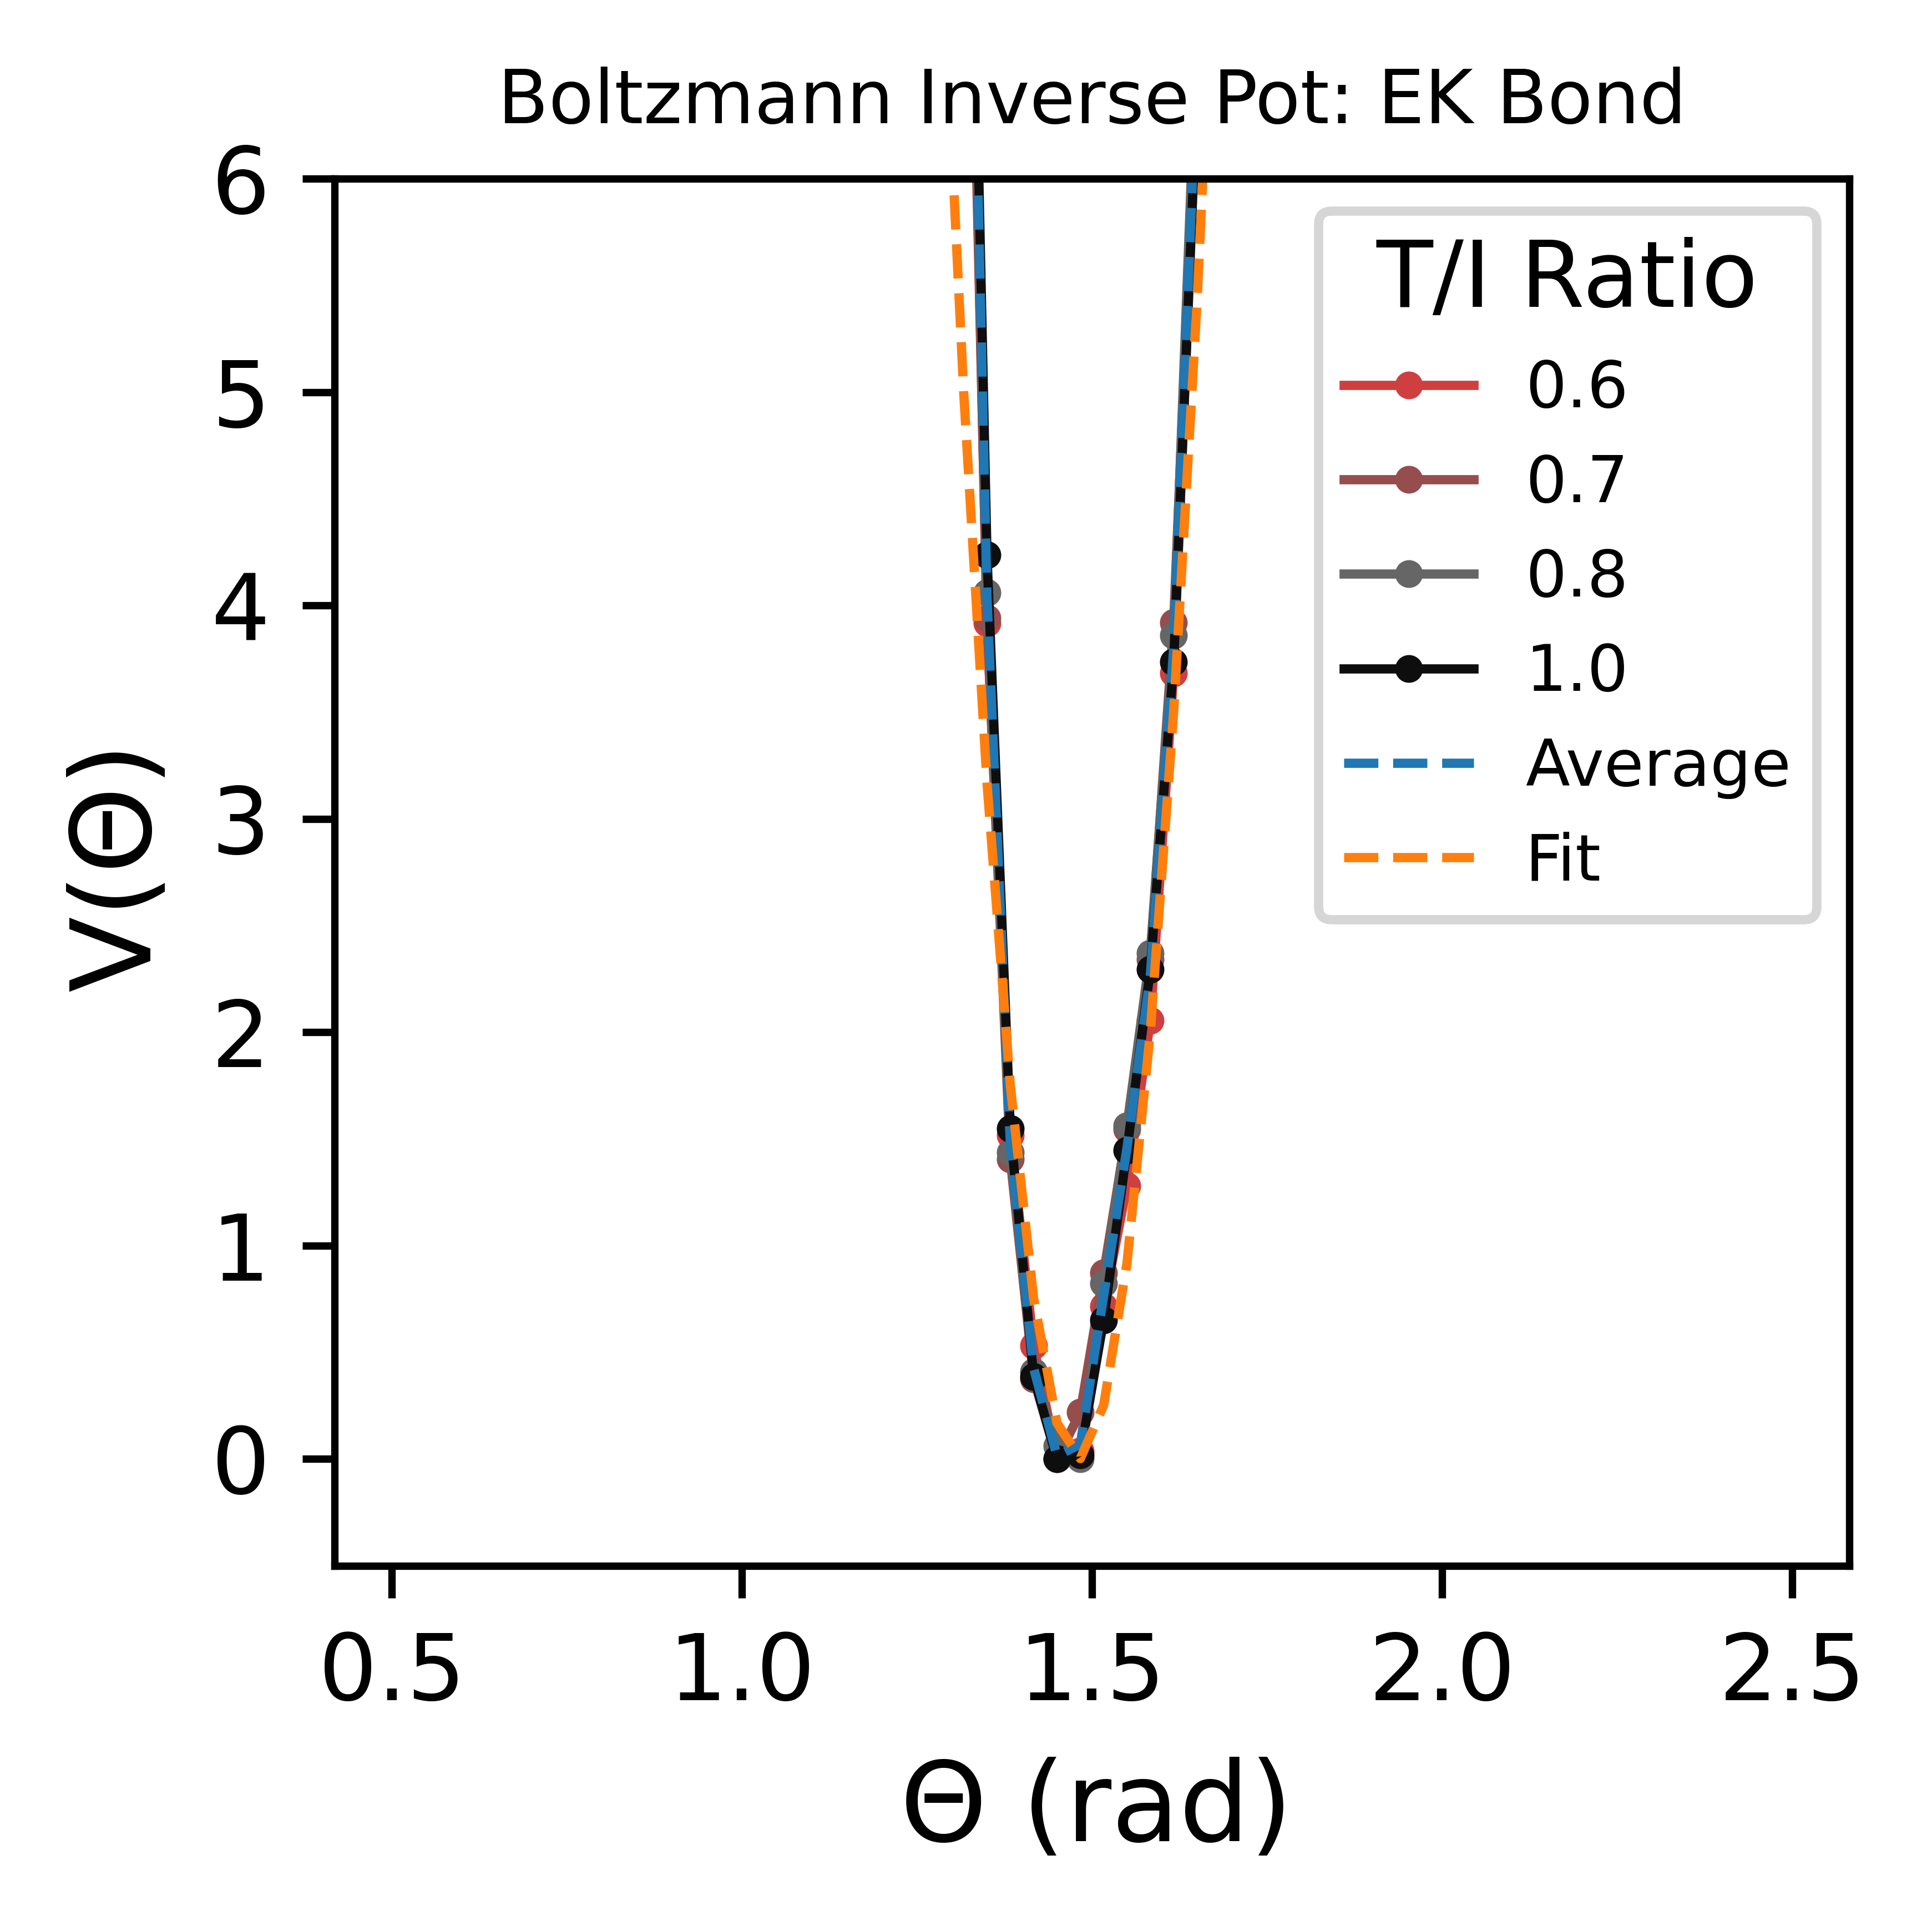

In [16]:
kT = 8.5
n_bins = 60
l_min = 0.5
l_max = 2.5
dl = (l_max - l_min) / (n_bins - 1)
save_files = True
fig = plt.figure()

avg_bond_inv = np.zeros(60)

for weight, job in project.find_jobs(
    {"polymer_lengths": [16], "kT_quench": kT}, {"done": True}).groupby("para_weight"):
    if weight == 1.0:
        adj = 4 # Adjust indices used to find slope
    else:
        adj = 0
        
    job = list(job)[0]
    bdist = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "E",
        B_name = "K",
        start=-200,
        histogram=True,
        normalize=True,
        bins=n_bins,
        l_min=l_min,
        l_max=l_max
    )
    smooth = savitzky_golay(bdist[:,1], window_size=5, order=1)

    V = -kT * np.log(smooth)
    V -= V.min()
    avg_bond_inv += V
    inf_indices = np.where(V == np.infty)[0]
    non_inf_indices = np.where(V != np.infty)[0]
    # Head Linear Extrapolation
    cutoff = non_inf_indices[0] - 1
    slope = (
        (V[cutoff + 3 + adj] - V[cutoff + 1 + adj]) /
        (bdist[:,0][cutoff + 3 + adj] - bdist[:,0][cutoff + 1 + adj])
    )
    head_range = bdist[:,0][0:non_inf_indices[0]]
    V[0:non_inf_indices[0]] = slope * (head_range - bdist[:,0][cutoff+1]) + V[cutoff + 1]
    
    # Tail Linear Extrapolation
    cutoff = non_inf_indices[-1] + 1 
    slope = (
        (V[cutoff - 3] - V[cutoff - 1]) /
        (bdist[:,0][cutoff - 3] - bdist[:,0][cutoff - 1])
    )
    tail_range = bdist[:,0][non_inf_indices[-1]+1:]
    V[cutoff:] = slope * (tail_range - bdist[:,0][cutoff - 1]) + V[cutoff - 1]
    plt.plot(bdist[:,0], V, label=weight, c=color_dict[weight])

plt.plot(bdist[:,0], avg_bond_inv/4, "--", label="Average")
harmonic_fit = bond_harmonic(bdist[:,0], k=375, l0=1.48)
plt.plot(bdist[:,0], harmonic_fit, "--", label="Fit")
    
#plt.xlim(1, 2.5)
plt.ylim(-.5, 6)
plt.title("Boltzmann Inverse Pot: EK Bond", fontsize=8)
plt.legend(title="T/I Ratio", loc="upper right")
plt.xlabel("$\Theta$ (rad)")
plt.ylabel("V($\Theta$)")
fig.tight_layout()

### K-K Bonds

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

for weight, job in project.find_jobs(
{"polymer_lengths": [16], "kT_quench": 8.5}).groupby("para_weight"):
    job = list(job)[0]
    print(job.id, weight)
    bdist = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-200,
        histogram=True
    )
    smooth = savitzky_golay(bdist[:,1], window_size=5, order=1)
    ax.plot(bdist[:,0], smooth, label=weight, c=color_dict[weight])
    
ax.legend(title="T/I Ratio", loc="upper left")
ax.set_title("KK Bond")
ax.set_xlim(0.5, 2.5)
ax.set_xlabel("$L(\sigma)$")
ax.set_ylabel("P($L$)")
fig.tight_layout()

In [ ]:
fig.savefig("../figures/kk-bond-dist.png")

## Boltzmann Inverse of K-K Bonds:

<>:64: DeprecationWarning: invalid escape sequence \T
<>:65: DeprecationWarning: invalid escape sequence \T
<>:64: DeprecationWarning: invalid escape sequence \T
<>:65: DeprecationWarning: invalid escape sequence \T
/tmp/ipykernel_111464/1243771688.py:64: DeprecationWarning: invalid escape sequence \T
  plt.xlabel("$\Theta$ (rad)")
/tmp/ipykernel_111464/1243771688.py:65: DeprecationWarning: invalid escape sequence \T
  plt.ylabel("V($\Theta$)")
/tmp/ipykernel_111464/1243771688.py:32: RuntimeWarning: divide by zero encountered in log
  V = -kT * np.log(smooth)


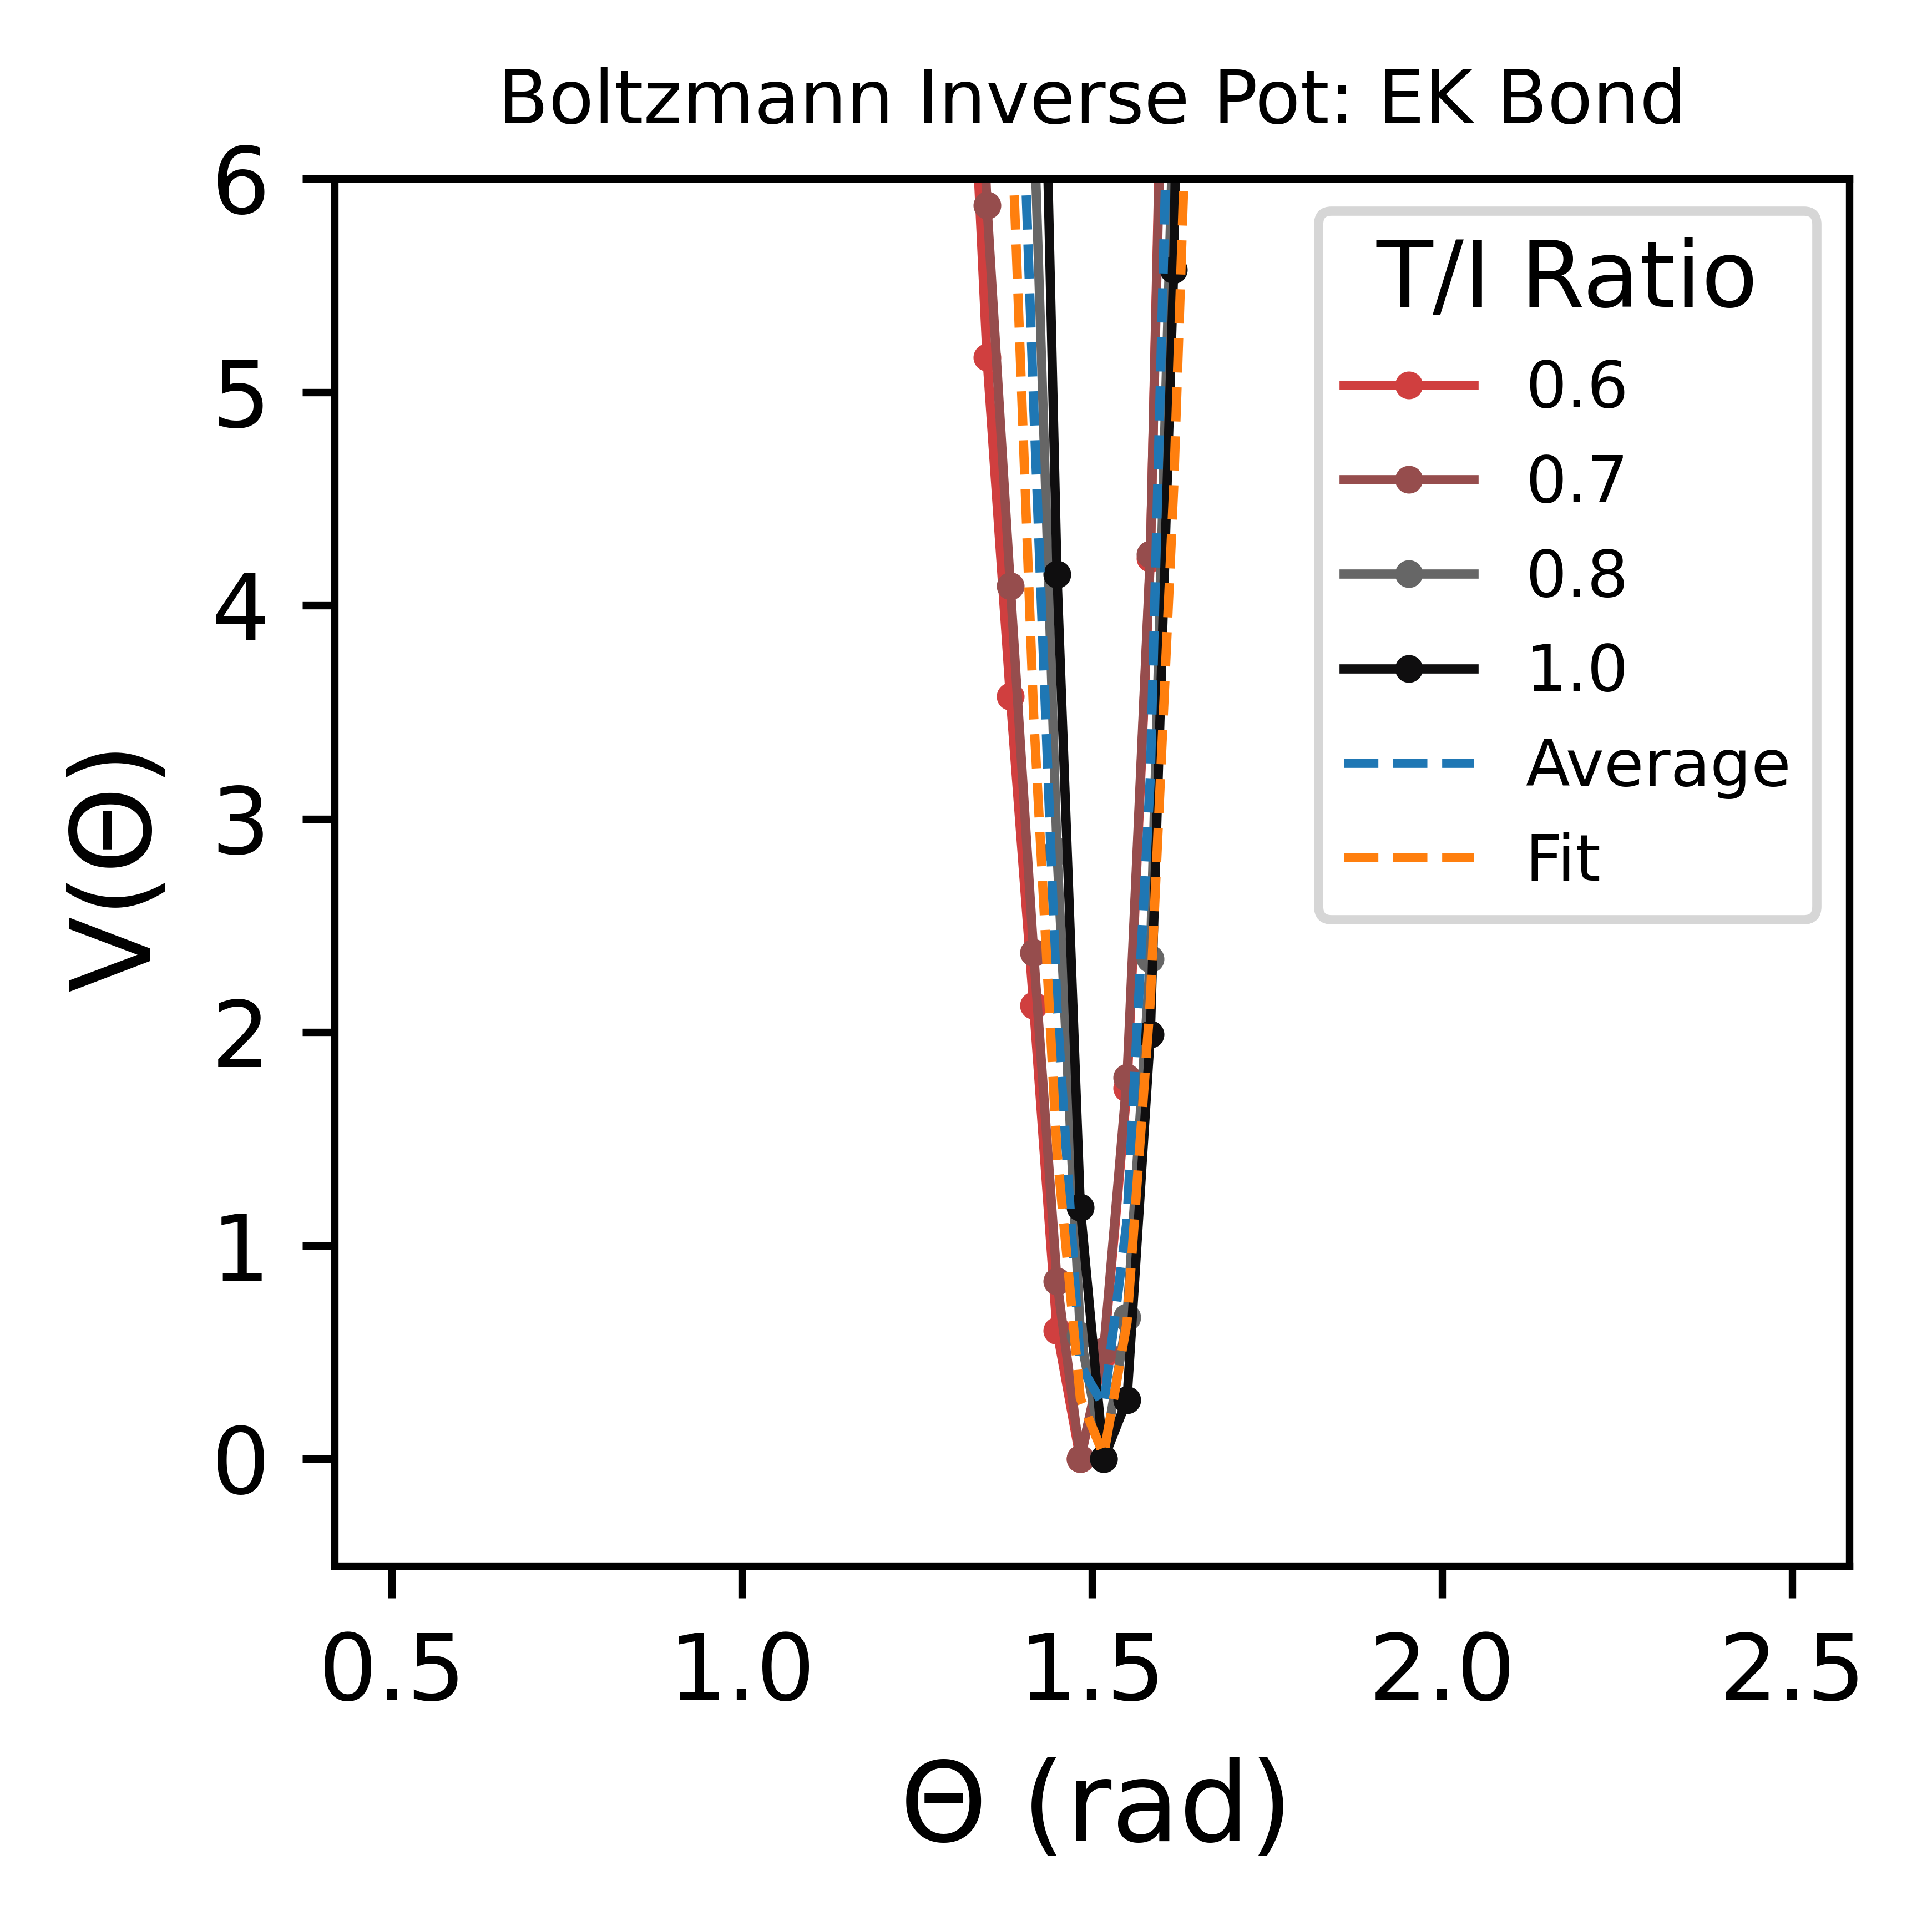

In [21]:
kT = 8.5
n_bins = 60
l_min = 0.5
l_max = 2.5
dl = (l_max - l_min) / (n_bins - 1)
save_files = True
fig = plt.figure()

avg_bond_inv = np.zeros(60)

for weight, job in project.find_jobs(
    {"polymer_lengths": [16], "kT_quench": kT}, {"done": True}).groupby("para_weight"):
    if weight == 1.0:
        adj = 4 # Adjust indices used to find slope
    else:
        adj = 0
        
    job = list(job)[0]
    bdist = bond_distribution(
        gsd_file = job.fn("components.gsd"),
        A_name = "K",
        B_name = "K",
        start=-200,
        histogram=True,
        normalize=True,
        bins=n_bins,
        l_min=l_min,
        l_max=l_max
    )
    smooth = savitzky_golay(bdist[:,1], window_size=5, order=1)

    V = -kT * np.log(smooth)
    V -= V.min()
    avg_bond_inv += V
    inf_indices = np.where(V == np.infty)[0]
    non_inf_indices = np.where(V != np.infty)[0]
    # Head Linear Extrapolation
    cutoff = non_inf_indices[0] - 1
    slope = (
        (V[cutoff + 3 + adj] - V[cutoff + 1 + adj]) /
        (bdist[:,0][cutoff + 3 + adj] - bdist[:,0][cutoff + 1 + adj])
    )
    head_range = bdist[:,0][0:non_inf_indices[0]]
    V[0:non_inf_indices[0]] = slope * (head_range - bdist[:,0][cutoff+1]) + V[cutoff + 1]
    
    # Tail Linear Extrapolation
    cutoff = non_inf_indices[-1] + 1 
    slope = (
        (V[cutoff - 3] - V[cutoff - 1]) /
        (bdist[:,0][cutoff - 3] - bdist[:,0][cutoff - 1])
    )
    tail_range = bdist[:,0][non_inf_indices[-1]+1:]
    V[cutoff:] = slope * (tail_range - bdist[:,0][cutoff - 1]) + V[cutoff - 1]
    plt.plot(bdist[:,0], V, label=weight, c=color_dict[weight])

plt.plot(bdist[:,0], avg_bond_inv/4, "--", label="Average")
harmonic_fit = bond_harmonic(bdist[:,0], k=800, l0=1.51)
plt.plot(bdist[:,0], harmonic_fit, "--", label="Fit")
    
#plt.xlim(1, 2.5)
plt.ylim(-.5, 6)
plt.title("Boltzmann Inverse Pot: EK Bond", fontsize=8)
plt.legend(title="T/I Ratio", loc="upper right")
plt.xlabel("$\Theta$ (rad)")
plt.ylabel("V($\Theta$)")
fig.tight_layout()

# -----------------------------------------------------------
# Radial Distribution Functions: <a name="rdfs"></a>

In [ ]:
for weight, job in project.find_jobs(
    filter={"polymer_lengths": [16], "kT_quench": 6.5, "n_compounds": [1]}).groupby("para_weight"):
    job = list(job)[0]
    print(job)
    rdf, norm = gsd_rdf(
        job.fn("components.gsd"),
        start=-100,
        stop=-1,
        bins=100,
        A_name="E",
        B_name="K",
        r_max=5.0,
        exclude_bonded=False,
    )
    
    rdf_smooth = savitzky_golay(rdf.rdf*norm, window_size=7, order=2)
    where_neg = np.where(rdf_smooth < 0)
    rdf_smooth[where_neg[0]] = 0
    plt.plot(rdf.bin_centers, rdf_smooth, label=weight, linewidth=1)
    #plt.plot(rdf.bin_centers, rdf.rdf * norm, linewidth=1)
    #plt.plot(rdf.bin_centers, rdf.rdf*norm, "k-", label=weight, linewidth=1)


plt.legend()
plt.show()

# -----------------------------------------------------------
# Chain Structure: <a name="chainstructure"></a>

# Trends with T/I Ratio:

In [6]:
kT = 7.0

cg_filter = {
    "polymer_lengths": [16],
    #"cg_potentials_dir": "1.0alpha-1e6steps",
    #"cg_potentials_dir": "dense-state",
    "cg_potentials_dir": "tail-correction",
    "kT_quench": kT,
}

ua_filter = {"polymer_lengths": [16], "kT_quench": kT,}

### Persistence Length ($L_p$) <a name="persistencelength"></a>

### Radius of Gyration: <a name="radiusofgyration"></a>

### End-to-End Distance <a name="endtoend"></a>

# Chain Structure:

# Trends with Temp:

In [7]:
para_weight = 1.0
n_frames = 500
lp_window_size = 20
polymer_lengths = 16
cg_model = "dense-state"
cg_model2 = "rmax_4_angles2"
max_temp = 6.5

ua_filter = {"polymer_lengths": [polymer_lengths], "para_weight": para_weight}
cg_filter = {"polymer_lengths": [polymer_lengths], "ekk_weight": para_weight, "cg_potentials_dir": cg_model}
cg_filter2 = {"polymer_lengths": [polymer_lengths], "ekk_weight": para_weight, "cg_potentials_dir": cg_model2}

In [8]:
for job in cg_project.find_jobs(cg_filter2):
    print(job, job.sp.kT_quench)

NameError: name 'cg_project' is not defined

## Get Chain Stats for Target Systems:

In [ ]:
ua_temps = []

ua_lp_results = []
ua_lp_std = []

ua_rg_results = []
ua_rg_std = []

ua_re_results = []
ua_re_std = []

for kT, job in ua_project.find_jobs(filter=ua_filter).groupby("kT_quench"):
    if kT > max_temp:
        continue
    job = list(job)[0]
    ua_temps.append(kT)
    
    # Persistence Lenghts
    with gsd.hoomd.open(job.fn("components.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames
        
    lp, lp_std = persistence_length(
        gsd_file=job.fn("components.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    ua_lp_results.append(lp)
    ua_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("components.gsd"), n_frames=n_frames)
    ua_rg_results.append(np.mean(rg))
    ua_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("components.gsd"), n_frames=n_frames)
    ua_re_results.append(np.mean(re))
    ua_re_std.append(np.std(re))

## Get Chain Stats for CG Models:

In [ ]:
cg_temps = []

cg_lp_results = []
cg_lp_std = []

cg_rg_results = []
cg_rg_std = []

cg_re_results = []
cg_re_std = []

for kT, job in cg_project.find_jobs(filter=cg_filter).groupby("kT_quench"):
    if kT > max_temp:
        continue
    job = list(job)[0]
    cg_temps.append(kT)
    with gsd.hoomd.open(job.fn("sim_traj.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames

    lp, lp_std = persistence_length(
        gsd_file=job.fn("sim_traj.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    cg_lp_results.append(lp)
    cg_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg_rg_results.append(np.mean(rg))
    cg_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg_re_results.append(np.mean(re))
    cg_re_std.append(np.std(re))

In [ ]:
cg2_temps = []

cg2_lp_results = []
cg2_lp_std = []

cg2_rg_results = []
cg2_rg_std = []

cg2_re_results = []
cg2_re_std = []

for kT, job in cg_project.find_jobs(filter=cg_filter2).groupby("kT_quench"):
    if kT > max_temp:
        continue
    job = list(job)[0]
    cg2_temps.append(kT)
    with gsd.hoomd.open(job.fn("sim_traj.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames

    lp, lp_std = persistence_length(
        gsd_file=job.fn("sim_traj.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    cg2_lp_results.append(lp)
    cg2_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg2_rg_results.append(np.mean(rg))
    cg2_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg2_re_results.append(np.mean(re))
    cg2_re_std.append(np.std(re))

### Persistence Length ($L_p$) <a name="persistencelengthtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_temps, y=ua_lp_results, yerr=ua_lp_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_temps, y=cg_lp_results, yerr=cg_lp_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_temps, y=cg2_lp_results, yerr=cg2_lp_std, label="MSIBI: Angle Updated", c="gray")

plt.legend()
plt.xlabel("kT")
plt.ylabel("$l_p (\sigma)$")
plt.title(f"Persistence Length (T/I={para_weight})")
plt.show()

### Radias of Gyration <a name="radiusofgyrationtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_temps, y=ua_rg_results, yerr=ua_rg_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_temps, y=cg_rg_results, yerr=cg_rg_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_temps, y=cg2_rg_results, yerr=cg2_rg_std, label="MSIBI: Angle Updated", c="gray")

plt.xlabel("kT")
plt.ylabel("$<R_g^2> (\sigma^2)$")
plt.title(f"Radius of Gyration (T/I={para_weight})")
plt.legend()

### End-to-End Distance <a name="endtoendtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_temps, y=ua_re_results, yerr=ua_re_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_temps, y=cg_re_results, yerr=cg_re_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_temps, y=cg2_re_results, yerr=cg2_re_std, label="MSIBI: Angle Updated", c="gray")
plt.xlabel("kT")
plt.ylabel("$<R_e^2> (\sigma^2)$")
plt.title(f"End-to-End Distance (T/I={para_weight})")
plt.legend()

### Re/Rg Ratio:

In [ ]:
fig = plt.figure()
plt.plot(cg_temps_dense, cg_ratio_dense, "o", label="CG w/Dense Bulk.")
plt.plot(cg_temps_zero_tail, cg_ratio_zero_tail, "x", label="CG w/ Dense Bulk + Zero Tail")
plt.plot(cg_temps_single_chain, cg_ratio_single_chain, "x", label="CG Single Chain")
plt.plot(ua_temps, ua_ratio, "^", label="UA Model")
plt.title(f"Re/Rg Ratio Trend (T/I = {para_weight})")
plt.xlabel("kT")
plt.ylabel("$\dfrac{<R_E^2>}{<R_g^2>}$")
plt.legend()
plt.show()

# -----------------------------------------------------------
# Chain Structure: <a name="chainstructure"></a>

# Trends with T/I Ratio:

In [ ]:
kT = 7.0

cg_filter = {
    "polymer_lengths": [16],
    #"cg_potentials_dir": "1.0alpha-1e6steps",
    #"cg_potentials_dir": "dense-state",
    "cg_potentials_dir": "dense-state",
    "kT_quench": kT,
}

ua_filter = {"polymer_lengths": [16], "kT_quench": kT,}

### Persistence Length ($L_p$) <a name="persistencelength"></a>

### Radius of Gyration: <a name="radiusofgyration"></a>

### End-to-End Distance <a name="endtoend"></a>

# Chain Structure:

# Trends with Temp:

In [ ]:
para_weight = 1.0
kT = 6.5
n_frames = 500
lp_window_size = 20
polymer_lengths = 16
cg_model = "dense-state"
cg_model2 = "rmax_4_angles2"
max_temp = 8.0

ua_filter = {"polymer_lengths": [polymer_lengths], "kT_quench": kT}
cg_filter = {"polymer_lengths": [polymer_lengths], "kT_quench": kT, "cg_potentials_dir": cg_model}
cg_filter2 = {"polymer_lengths": [polymer_lengths], "kT_quench": kT, "cg_potentials_dir": cg_model2}

In [ ]:
for job in cg_project.find_jobs(cg_filter2):
    print(job, job.sp.ekk_weight)

## Get Chain Stats for Target Systems:

In [ ]:
ua_weights = []

ua_lp_results = []
ua_lp_std = []

ua_rg_results = []
ua_rg_std = []

ua_re_results = []
ua_re_std = []

for weight, job in ua_project.find_jobs(filter=ua_filter).groupby("para_weight"):
    if weight == 0.9:
        continue
    job = list(job)[0]
    ua_weights.append(weight)
    
    # Persistence Lenghts
    with gsd.hoomd.open(job.fn("components.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames
        
    lp, lp_std = persistence_length(
        gsd_file=job.fn("components.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    ua_lp_results.append(lp)
    ua_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("components.gsd"), n_frames=n_frames)
    ua_rg_results.append(np.mean(rg))
    ua_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("components.gsd"), n_frames=n_frames)
    ua_re_results.append(np.mean(re))
    ua_re_std.append(np.std(re))

## Get Chain Stats for CG Models:

In [ ]:
cg_weights = []

cg_lp_results = []
cg_lp_std = []

cg_rg_results = []
cg_rg_std = []

cg_re_results = []
cg_re_std = []

for weight, job in cg_project.find_jobs(filter=cg_filter).groupby("ekk_weight"):
    if weight == 0.9:
        continue
    job = list(job)[0]
    cg_weights.append(weight)
    with gsd.hoomd.open(job.fn("sim_traj.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames

    lp, lp_std = persistence_length(
        gsd_file=job.fn("sim_traj.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    cg_lp_results.append(lp)
    cg_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg_rg_results.append(np.mean(rg))
    cg_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg_re_results.append(np.mean(re))
    cg_re_std.append(np.std(re))

In [ ]:
cg2_weights = []

cg2_lp_results = []
cg2_lp_std = []

cg2_rg_results = []
cg2_rg_std = []

cg2_re_results = []
cg2_re_std = []

for weight, job in cg_project.find_jobs(filter=cg_filter2).groupby("ekk_weight"):
    if weight == 0.9:
        continue
    job = list(job)[0]
    cg2_weights.append(weight)
    with gsd.hoomd.open(job.fn("sim_traj.gsd"), "rb") as traj:
        lp_stop = len(traj)
        lp_start = lp_stop - n_frames

    lp, lp_std = persistence_length(
        gsd_file=job.fn("sim_traj.gsd"),
        start=lp_start,
        stop=lp_stop,
        window_size=lp_window_size,
        select_atoms_arg="name E K"
    )
    cg2_lp_results.append(lp)
    cg2_lp_std.append(lp_std)
    
    # Radius of Gyration:
    rg = radius_of_gyration(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg2_rg_results.append(np.mean(rg))
    cg2_rg_std.append(np.std(rg))
    
    # End-to-End Distance:
    re = end_to_end(job.fn("sim_traj.gsd"), n_frames=n_frames)
    cg2_re_results.append(np.mean(re))
    cg2_re_std.append(np.std(re))

### Persistence Length ($L_p$) <a name="persistencelengthtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_weights, y=ua_lp_results, yerr=ua_lp_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_weights, y=cg_lp_results, yerr=cg_lp_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_weights, y=cg2_lp_results, yerr=cg2_lp_std, label="MSIBI: Angle Updated", c="gray")

plt.legend()
#plt.title("Persistence Length")
plt.xlabel("T/I Ratio")
plt.ylabel("$l_p (\sigma)$")
plt.title(f"Persistence Length (kT={kT})")
plt.show()

### Radias of Gyration <a name="radiusofgyrationtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_weights, y=ua_rg_results, yerr=ua_rg_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_weights, y=cg_rg_results, yerr=cg_rg_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_weights, y=cg2_rg_results, yerr=cg2_rg_std, label="MSIBI: Angle Updated", c="gray")

plt.xlabel("T/I Ratio")
plt.ylabel("$<R_g^2> (\sigma^2)$")
plt.title(f"Radius of Gyration (kT={kT})")
plt.legend()

### End-to-End Distance <a name="endtoendtemp"></a>

In [ ]:
fig = plt.figure()
plt.errorbar(x=ua_weights, y=ua_re_results, yerr=ua_re_std, label="Atomistic Target", c="k")
plt.errorbar(x=cg_weights, y=cg_re_results, yerr=cg_re_std, label="MSIBI", c="r")
plt.errorbar(x=cg2_weights, y=cg2_re_results, yerr=cg2_re_std, label="MSIBI: Angle Updated", c="gray")
plt.xlabel("T/I Ratio")
plt.ylabel("$<R_e^2> (\sigma^2)$")
plt.title(f"End-to-End Distance (kT={kT})")
plt.legend()

### Re/Rg Ratio:

In [ ]:
fig = plt.figure()
plt.plot(cg_temps_dense, cg_ratio_dense, "o", label="CG w/Dense Bulk.")
plt.plot(cg_temps_zero_tail, cg_ratio_zero_tail, "x", label="CG w/ Dense Bulk + Zero Tail")
plt.plot(cg_temps_single_chain, cg_ratio_single_chain, "x", label="CG Single Chain")
plt.plot(ua_temps, ua_ratio, "^", label="UA Model")
plt.title(f"Re/Rg Ratio Trend (T/I = {para_weight})")
plt.xlabel("kT")
plt.ylabel("$\dfrac{<R_E^2>}{<R_g^2>}$")
plt.legend()
plt.show()